# Project: **Travel Destination Recommender**



1. [Executive Summary](#1-executive-summary)
2. [Introduction](#2-introduction)
3. [Data Collection](#3-loading-the-data)
   - 3.1. [Importing Packages](#31-loading-libraries-and-reading-the-data)
   - 3.2. [Data Preprocessing](#32-data-size-and-structure-of-dataset)
   - 3.3. [Cleaning the Data](#32-data-size-and-structure-of-dataset) 
4. [Sentiment Analysis](#4-exploratory-data-analysis-eda)
   - 4.1. [Checking the relationships between the independent variables and the dependent variable](#41-do-clinton-or-trump-also-tweet-in-languages-other-than-english)
   - 4.2. [Data Visualisation](#42-which-people-were-retweeted)
   - 4.3. [Checking the data distribution](#42-which-people-were-retweeted)
5. [Feature Engineering](#5-text-mining)
6. [Model Development](#5-text-mining)
7. [Model Evaluation](#6-bigrams-continuing-with-tidytext)
8. [Real-time Implementation](#7-sentiment-analysis)

---



## Introduction

The aim of this project is to develop a travel destination recommender system that leverages data scraped from various travel websites such as TripAdvisor, Lonely Planet, and Yelp. By aggregating information on attractions, hotels, restaurants, and local experiences, the system will provide personalized recommendations based on user preferences, budget, and interests.




## Step 1: Choose Travel Websites

- TripAdvisor (https://www.tripadvisor.com/)
- Lonely Planet (https://www.lonelyplanet.com/)
- Yelp (https://www.yelp.com/)
- Booking.com (https://www.booking.com/)



### TripAdvisor (https://www.tripadvisor.com/)
TripAdvisor stands out as an ideal choice due to its comprehensive coverage of travel information. Boasting one of the largest repositories of user-generated reviews and ratings, it offers valuable insights into travelers' experiences and preferences. Moreover, TripAdvisor's attraction rankings based on popularity and user ratings make it an invaluable resource for identifying top destinations. With its global coverage spanning diverse destinations worldwide, it caters to a broad spectrum of travel interests and preferences.

### Lonely Planet (https://www.lonelyplanet.com/)
Lonely Planet emerges as a prime candidate for scraping travel data owing to its reputation for expert recommendations and curated travel guides. Renowned for its commitment to promoting authentic and off-the-beaten-path experiences, Lonely Planet offers travelers reliable insights into unique adventures. Its guides are not only informative but also provide in-depth cultural insights and historical background, enriching travelers' understanding of destinations. Additionally, Lonely Planet's specialized guides cater to various interests, including food, adventure, and cultural exploration, ensuring relevance to diverse traveler preferences.

### Yelp (https://www.yelp.com/)
Yelp is an excellent choice for scraping travel data, particularly regarding restaurant reviews and local business information. With a focus on providing comprehensive coverage of local businesses, including attractions, shops, and services, Yelp offers valuable information for travelers. Its user-generated content allows travelers to access authentic reviews and recommendations from fellow travelers and locals alike. Furthermore, Yelp's location-based search feature facilitates the discovery of nearby attractions, restaurants, and activities, streamlining the trip planning process for travelers.

### Booking.com (https://www.booking.com/)
Booking.com emerges as a suitable option for scraping accommodation-related data, given its extensive coverage of hotel and accommodation listings. As a leading platform for hotel bookings, Booking.com offers a vast selection of properties worldwide, catering to various budgets and preferences. The platform's user reviews and ratings provide valuable insights into the quality and guest experiences of accommodations, enabling travelers to make informed decisions. Additionally, Booking.com's range of booking options, including flexible cancellation policies and last-minute deals, enhances its appeal to travelers seeking convenience and flexibility in their bookings.



## Step 2: Identifying Data to Scrape

- Attractions (sights, landmarks, museums, parks)
- Hotels (ratings, prices, amenities)
- Restaurants (ratings, cuisines, prices)
- Local Experiences (tours, activities, events)
- User preferences (budget, interests, travel dates)



### Attractions (sights, landmarks, museums, parks)
Scraping data on attractions entails gathering information about notable sights, landmarks, museums, and parks in various destinations. These attractions serve as key points of interest for travelers, offering cultural, historical, and recreational experiences. By scraping data on attractions, the recommender system can provide travelers with insights into must-visit locations, including details on opening hours, admission fees, visitor reviews, and notable features.

### Hotels (ratings, prices, amenities)
Hotels constitute a crucial aspect of travel planning, providing accommodations for travelers during their trips. Scraping data on hotels involves gathering information on their ratings, prices, and amenities. Ratings and reviews from previous guests offer valuable insights into the quality and service standards of hotels, helping travelers make informed decisions. Additionally, pricing information enables travelers to compare options based on their budget constraints, while details on amenities such as Wi-Fi, breakfast, and parking facilities enhance the overall user experience.

### Restaurants (ratings, cuisines, prices)
Restaurants play a vital role in enhancing the travel experience by offering diverse culinary experiences and flavors unique to each destination. Scraping data on restaurants involves gathering information on their ratings, cuisines, and prices. User-generated ratings and reviews provide valuable feedback on the quality of food, service, and ambiance, aiding travelers in selecting dining options that align with their preferences. Moreover, details on cuisines and price ranges allow travelers to explore a variety of dining options that suit their tastes and budget.

### Local Experiences (tours, activities, events)
Local experiences encompass a wide range of tours, activities, and events that offer immersive and authentic cultural experiences for travelers. Scraping data on local experiences involves gathering information on guided tours, outdoor activities, cultural events, and entertainment options available in each destination. By providing insights into these experiences, the recommender system enables travelers to discover and participate in activities that align with their interests and preferences, enhancing their overall travel experience.

### User Preferences (budget, interests, travel dates)
User preferences constitute the foundation of personalized travel recommendations, guiding the selection of destinations and experiences that best suit each traveler's needs and preferences. Scraping data on user preferences involves gathering information on budget constraints, travel interests, and travel dates. By understanding travelers' budget limitations, interests such as adventure, history, or culinary exploration, and travel dates, the recommender system can tailor recommendations to match individual preferences, ensuring a customized and enjoyable travel experience for each user.



## Step 3: Set Up Your Environment

- Choose programming language (e.g., Python) and web scraping libraries (e.g., BeautifulSoup, requests)
- Install necessary libraries:

    ```bash
    pip install beautifulsoup4 requests
    ```


### Instant Data Scraper Web Extension
For this project, the Instant Data Scraper web extension was utilized as an alternative to traditional web scraping libraries like BeautifulSoup and requests. Instant Data Scraper is a browser extension available for Chrome and Firefox, designed specifically for scraping data from web pages with ease. By installing the extension, users gain access to a user-friendly interface that allows them to select and extract data directly from websites without writing code. This approach simplifies the process of data extraction, making it accessible to individuals without extensive programming knowledge. Additionally, the extension provides features for exporting scraped data in various formats, such as CSV or JSON, for further analysis and processing.

### Octoparse
In addition to the Instant Data Scraper web extension, Octoparse was employed as a web scraping tool for this project. Octoparse is a powerful and versatile web scraping software that enables users to extract data from websites using a visual point-and-click interface. With Octoparse, users can create scraping tasks by simply navigating through web pages and selecting the data they want to extract. The software offers advanced features such as automatic IP rotation, data export scheduling, and cloud-based extraction for handling large-scale scraping projects efficiently. Furthermore, Octoparse provides support for scraping dynamic and JavaScript-rendered web pages, ensuring compatibility with a wide range of websites and data sources.


In [2]:
#| echo: true
#| code-fold: true
#| panel: input
import pandas as pd
from bertopic import BERTopic
from nltk.corpus import stopwords
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from nltk.tokenize import word_tokenize
from bertopic import BERTopic
from nltk.corpus import stopwords
import string
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/emredeveci/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True


## Step 4: Start Scraping

- Write scripts to scrape data from each website.
- Example script for scraping top attractions in a city from TripAdvisor.




Now that we've set up our environment using web scraping tools like Instant Data Scraper and Octoparse, we can begin scraping data from each selected website. Instead of writing scripts, we'll utilize the intuitive interfaces provided by these tools to extract data seamlessly.

### Using Instant Data Scraper:
1. Launch the Instant Data Scraper web extension in your browser.
2. Navigate to the desired website, such as TripAdvisor or Lonely Planet.
3. Use the extension's point-and-click interface to select the data you want to scrape, such as top attractions in a city.
4. Configure the scraping settings, including pagination handling and data export options.
5. Run the scraper to extract the selected data from the website.
6. Export the scraped data in a suitable format, such as CSV or JSON, for further analysis.

### Using Octoparse:
1. Launch the Octoparse software on your computer.
2. Create a new scraping task and enter the URL of the target website.
3. Use Octoparse's visual workflow builder to define the extraction steps, such as navigating to specific pages and selecting data elements.
4. Configure advanced settings, such as automatic IP rotation and data export scheduling, as needed.
5. Run the scraping task to extract data from the website.
6. Review and verify the extracted data within the Octoparse interface.
7. Export the scraped data to your preferred format for analysis and processing.

By leveraging these web scraping tools, we can efficiently gather data from multiple websites without the need for writing complex scripts. This approach streamlines the scraping process and allows us to focus on refining and analyzing the extracted data for our travel destination recommender.



## Step 5: Refine Your Scripts

- Refine scripts to extract specific data like hotel details, restaurant reviews, and activity information.
- Handle pagination for websites with multiple pages of results.
- Adapt scripts to website structure changes.



**Must-See Attractions:**

I have chosen Lonely Planet for attractions in this project based on several factors. Lonely Planet is a well-known and respected travel guide publisher, making it a valuable source of information for travelers. Lonely Planet is detailed, and user-friendly information, making it easy to scrape data efficiently. Their guides cover a wide range of attractions, from popular landmarks to hidden gems, ensuring diverse recommendations. Users trust Lonely Planet's ratings and reviews, enhancing the credibility of your recommendation engine. Additionally, Lonely Planet's global coverage and inspirational content spark wanderlust, catering to a broad user base. By leveraging Lonely Planet's wealth of travel knowledge, your app can provide personalized and exciting suggestions for memorable travel experiences. Here quick summary of the data:










### Must-See Attractions

In [3]:
#| echo: true
#| code-fold: true
#| panel: input
# Load data from CSV file
berlin = pd.read_csv('/Users/emredeveci/Desktop/data science/Travel Destination Recommender/data_mining/berlin_attractions - Sheet1.csv')
berlin.head()


website1  \
0  https://lp-cms-production.imgix.net/2019-06/d6...   
1  https://lp-cms-production.imgix.net/2021-08/sh...   
2  https://lp-cms-production.imgix.net/2019-06/d5...   
3  https://lp-cms-production.imgix.net/2021-08/sh...   
4  https://lp-cms-production.imgix.net/2024-02/Ge...   

                                            website2               name  \
0  https://www.lonelyplanet.com/germany/berline/m...       Museumsinsel   
1  https://www.lonelyplanet.com/germany/berline/m...       Neues Museum   
2  https://www.lonelyplanet.com/germany/berline/m...     Pergamonmuseum   
3  https://www.lonelyplanet.com/germany/berlin/fr...  East Side Gallery   
4  https://www.lonelyplanet.com/germany/berline/m...        Fernsehturm   

                        location  \
0  Museumsinsel & Alexanderplatz   
1  Museumsinsel & Alexanderplatz   
2  Museumsinsel & Alexanderplatz   
3                 Friedrichshain   
4  Museumsinsel & Alexanderplatz   

                                         description      type    city  
0  Walk through ancient Babylon, meet an Egyptian...  must_see  Berlin  
1  For over 60 years, not a soul was able to visi...  must_see  Berlin  
2  The Pergamonmuseum is one of Berlin’s most vis...  must_see  Berlin  
3  The East Side Gallery is the embodiment of Ber...  must_see  Berlin  
4  Germany's tallest structure, the TV Tower is a...  must_see  Berlin

In [4]:
#| echo: true
#| code-fold: true
#| panel: input
# Load data from CSV file
bremen = pd.read_csv('/Users/emredeveci/Desktop/data science/Travel Destination Recommender/data_mining/bremen_attractions - Sheet1.csv')
bremen.head()

website1  \
0  https://lonelyplanetstatic.imgix.net/marketing...   
1  https://lp-cms-production.imgix.net/2019-06/2a...   
2  https://lonelyplanetstatic.imgix.net/marketing...   
3  https://lonelyplanetstatic.imgix.net/marketing...   
4  https://lonelyplanetstatic.imgix.net/marketing...   

                                            website2  \
0  https://www.lonelyplanet.com/germany/lower-sax...   
1  https://www.lonelyplanet.com/germany/bergen-be...   
2  https://www.lonelyplanet.com/germany/lower-sax...   
3  https://www.lonelyplanet.com/germany/bremen-ci...   
4  https://www.lonelyplanet.com/germany/lower-sax...   

                         name               location  \
0         Herrenhäuser Gärten                Hanover   
1  Gedenkstätte Bergen-Belsen  Lower Saxony & Bremen   
2          Schloss Marienburg  Lower Saxony & Bremen   
3     Denkort Bunker Valentin            Bremen City   
4                   Autostadt  Lower Saxony & Bremen   

                                         description      type  \
0  Proof that Hanover is not all buttoned-down bu...  must_see   
1  The Nazi-built camp at Bergen-Belsen began its...  must_see   
2  Perched grandly above the Leine River, the neo...  must_see   
3  In 1943, the Nazis started construction of a m...  must_see   
4  A hit with car buffs of all ages, Autostadt is...  must_see   

                    city  
0  Lower Saxony & Bremen  
1  Lower Saxony & Bremen  
2  Lower Saxony & Bremen  
3  Lower Saxony & Bremen  
4  Lower Saxony & Bremen

In [5]:
#| echo: true
#| code-fold: true
#| panel: input
# Load data from CSV file
hamburg = pd.read_csv('/Users/emredeveci/Desktop/data science/Travel Destination Recommender/data_mining/hamburg_attractions - Sheet1.csv')
hamburg.head()


website1  \
0  https://lp-cms-production.imgix.net/2019-06/fd...   
1  https://lp-cms-production.imgix.net/2019-06/b7...   
2  https://lp-cms-production.imgix.net/2019-06/eb...   
3  https://lp-cms-production.imgix.net/2019-06/d7...   
4  https://lonelyplanetstatic.imgix.net/marketing...   

                                            website2                  name  \
0  https://www.lonelyplanet.com/germany/hamburg/a...    Mahnmal St-Nikolai   
1  https://www.lonelyplanet.com/germany/hamburg/s...            Fischmarkt   
2  https://www.lonelyplanet.com/germany/hamburg/s...       Elbphilharmonie   
3  https://www.lonelyplanet.com/germany/hamburg/a...  Hamburger Kunsthalle   
4  https://www.lonelyplanet.com/germany/hamburg/a...               Rathaus   

                location                                        description  \
0               Altstadt  St Nikolai church was the world’s tallest buil...   
1  St Pauli & Reeperbahn  Here's the perfect excuse to stay up all Satur...   
2                Hamburg  Welcome to one of the most Europe's most excit...   
3               Altstadt  A treasure trove of art from the Renaissance t...   
4               Altstadt  With its spectacular coffered ceiling, Hamburg...   

       type     city  
0  must_see  Hamburg  
1  must_see  Hamburg  
2  must_see  Hamburg  
3  must_see  Hamburg  
4  must_see  Hamburg

In [6]:
#| echo: true
#| code-fold: true
#| panel: input
# Load data from CSV file
munich = pd.read_csv('/Users/emredeveci/Desktop/data science/Travel Destination Recommender/data_mining/munich_attractions - Sheet1.csv')
munich.head()

website1  \
0  https://lp-cms-production.imgix.net/2019-06/c2...   
1  https://lp-cms-production.imgix.net/2019-06/ee...   
2  https://lp-cms-production.imgix.net/2019-06/3e...   
3  https://lp-cms-production.imgix.net/2019-06/0d...   
4  https://lp-cms-production.imgix.net/2019-06/c9...   

                                            website2                    name  \
0  https://www.lonelyplanet.com/germany/munich/ny...     Schloss Nymphenburg   
1  https://www.lonelyplanet.com/germany/munich/al...          Residenzmuseum   
2  https://www.lonelyplanet.com/germany/munich/ma...         Alte Pinakothek   
3  https://www.lonelyplanet.com/germany/munich/sc...       Englischer Garten   
4  https://www.lonelyplanet.com/germany/munich/ma...  Pinakothek der Moderne   

                                         description location      type  \
0  This commanding palace and its lavish gardens ...   Munich  must_see   
1  Home to Bavaria's Wittelsbach rulers from 1508...   Munich  must_see   
2  Munich's main repository of Old European Maste...   Munich  must_see   
3  The sprawling English Garden is among Europe's...   Munich  must_see   
4  Germany's largest modern-art museum unites fou...   Munich  must_see   

     city  
0  Munich  
1  Munich  
2  Munich  
3  Munich  
4  Munich

In [7]:
#| echo: true
#| code-fold: true
#| panel: input
# Concatenate the three dataframes along the rows (axis=0)
germany_df = pd.concat([bremen, berlin, hamburg,munich], ignore_index=True)

# Save the combined dataframe to a new CSV file
germany_df.to_csv('combined_dataset.csv', index=False)
germany_df.head()

website1  \
0  https://lonelyplanetstatic.imgix.net/marketing...   
1  https://lp-cms-production.imgix.net/2019-06/2a...   
2  https://lonelyplanetstatic.imgix.net/marketing...   
3  https://lonelyplanetstatic.imgix.net/marketing...   
4  https://lonelyplanetstatic.imgix.net/marketing...   

                                            website2  \
0  https://www.lonelyplanet.com/germany/lower-sax...   
1  https://www.lonelyplanet.com/germany/bergen-be...   
2  https://www.lonelyplanet.com/germany/lower-sax...   
3  https://www.lonelyplanet.com/germany/bremen-ci...   
4  https://www.lonelyplanet.com/germany/lower-sax...   

                         name               location  \
0         Herrenhäuser Gärten                Hanover   
1  Gedenkstätte Bergen-Belsen  Lower Saxony & Bremen   
2          Schloss Marienburg  Lower Saxony & Bremen   
3     Denkort Bunker Valentin            Bremen City   
4                   Autostadt  Lower Saxony & Bremen   

                                         description      type  \
0  Proof that Hanover is not all buttoned-down bu...  must_see   
1  The Nazi-built camp at Bergen-Belsen began its...  must_see   
2  Perched grandly above the Leine River, the neo...  must_see   
3  In 1943, the Nazis started construction of a m...  must_see   
4  A hit with car buffs of all ages, Autostadt is...  must_see   

                    city  
0  Lower Saxony & Bremen  
1  Lower Saxony & Bremen  
2  Lower Saxony & Bremen  
3  Lower Saxony & Bremen  
4  Lower Saxony & Bremen

In [8]:
#| echo: true
#| code-fold: true
#| panel: input
# Filter out rows where type is 'to_stay' or 'to_eat'
filtered_df = germany_df[~germany_df['type'].isin(['to_stay', 'to_eat'])]

### Tour Recommendation

In [9]:
#| echo: true
#| code-fold: true
#| panel: input
# Load data from CSV file
tour_bremen = pd.read_csv('/Users/emredeveci/Desktop/data science/Travel Destination Recommender/data_mining/bremen_tour - Sheet1.csv')
tour_bremen.head()

website  \
0  https://www.tripadvisor.com/AttractionProductR...   
1  https://www.tripadvisor.com/AttractionProductR...   
2  https://www.tripadvisor.com/AttractionProductR...   
3  https://www.tripadvisor.com/AttractionProductR...   
4  https://www.tripadvisor.com/AttractionProductR...   

                                                name             score  \
0  e-Scavenger hunt Bremen: Explore the city at y...  4.0 of 5 bubbles   
1  Bremen : Private Walking Tour With A Tour Guid...  3.0 of 5 bubbles   
2                           Bremen Schnoor Area Tour  5.0 of 5 bubbles   
3  Bremen Private Walking Tour With A Professiona...  5.0 of 5 bubbles   
4             Bremen - Private Historic Walking Tour  5.0 of 5 bubbles   

   reviews              type   duration  \
0     15.0      Audio Guides  2–4 hours   
1      2.0  Historical Tours  2–6 hours   
2      5.0  Historical Tours     1 hour   
3      1.0     Walking Tours  1–2 hours   
4      1.0  Historical Tours  1–2 hours   

                                            comment1 price      group    city  
0  Get to know Bremen in a unique and affordable ...   $34  per group  bremen  
1  Get to know the city through the eyes of a loc...   $52  per adult  bremen  
2  Explore with us the Schnoor area – a neighbour...   $24  per adult  bremen  
3  Meetingpoint: In front of the Town Hall or Mee...  $224  per group  bremen  
4  Discover the city of Bremen, a major cultural ...  $321  per group  bremen

In [10]:
#| echo: true
#| code-fold: true
#| panel: input
# Load data from CSV file
tour_hamburg = pd.read_csv('/Users/emredeveci/Desktop/data science/Travel Destination Recommender/data_mining/hamburg_tour - Sheet1.csv')
tour_hamburg.head()

website  \
0  https://www.tripadvisor.com/AttractionProductR...   
1  https://www.tripadvisor.com/AttractionProductR...   
2  https://www.tripadvisor.com/AttractionProductR...   
3  https://www.tripadvisor.com/AttractionProductR...   
4  https://www.tripadvisor.com/AttractionProductR...   

                                                name             score  \
0          The Local Tour of Hamburg Historic Centre  5.0 of 5 bubbles   
1  Private Small-Group Hamburg City Tour with a L...  5.0 of 5 bubbles   
2  Hop-on hop-off on the water with the Maritime ...  4.0 of 5 bubbles   
3                   Hamburg Dungeon Admission Ticket  4.0 of 5 bubbles   
4   Hamburg 2-hour harbor tour on the beautiful Elbe  3.5 of 5 bubbles   

  reviews              type   duration  \
0     784  Historical Tours    2 hours   
1     178  Historical Tours    3 hours   
2      63       Day Cruises  1–2 hours   
3     187  Historical Tours  1–2 hours   
4      21  Historical Tours    2 hours   

                                            comment1 price      group     city  
0  Pay-What-You-Want tour with booking fee!\n\nWi...    $3  per adult  hamburg  
1  Welcome to our beloved Hamburg.\nI´m a former ...  $264  per group  hamburg  
2  A sightseeing harbor cruise with the Maritime ...   $22  per adult  hamburg  
3  Experience 600 years of dark history - if you ...   $31  per adult  hamburg  
4  We offer an extensive Hamburg XXL harbor tour ...   $38  per adult  hamburg

In [11]:
#| echo: true
#| code-fold: true
#| panel: input
# Load data from CSV file
tour_berlin = pd.read_csv('/Users/emredeveci/Desktop/data science/Travel Destination Recommender/data_mining/berlin_tour - Sheet1.csv')
tour_berlin.head()

website  \
0  https://www.tripadvisor.com/AttractionProductR...   
1  https://www.tripadvisor.com/AttractionProductR...   
2  https://www.tripadvisor.com/AttractionProductR...   
3  https://www.tripadvisor.com/AttractionProductR...   
4  https://www.tripadvisor.com/AttractionProductR...   

                                                name             score  \
0              Discover Berlin Half-Day Walking Tour  5.0 of 5 bubbles   
1   River Cruise with Tour Guide in Berlin. Hadynski  4.5 of 5 bubbles   
2  Berlin Third Reich and Cold War 2-Hour Walking...  5.0 of 5 bubbles   
3     Big Bus Berlin Hop-On Hop-Off Sightseeing Tour  4.0 of 5 bubbles   
4    Berlin Food Walking Tour With Secret Food Tours  5.0 of 5 bubbles   

  reviews              type   duration  \
0   4,191  Historical Tours  3–4 hours   
1      36      On the Water     1 hour   
2     124  Historical Tours    2 hours   
3     404      Audio Guides    2 hours   
4     477      Food & Drink    3 hours   

                                            comment1 price      group    city  
0  See many of Berlin's most important landmarks ...   $22  per adult  berlin  
1  Enjoy our 1 hour river cruise through the old ...   $21  per adult  berlin  
2  Learn the tumultuous contemporary history of B...   $22  per adult  berlin  
3  Enjoy this perfect introduction to Berlin on a...   $27  per adult  berlin  
4  With so much great food in East Berlin, it can...  $105  per adult  berlin

In [12]:
#| echo: true
#| code-fold: true
#| panel: input
# Load data from CSV file
tour_munich = pd.read_csv('/Users/emredeveci/Desktop/data science/Travel Destination Recommender/data_mining/munich_tour - Sheet1.csv')
tour_munich.head()

website  \
0  https://www.tripadvisor.com/AttractionProductR...   
1  https://www.tripadvisor.com/AttractionProductR...   
2  https://www.tripadvisor.com/AttractionProductR...   
3                                                NaN   
4  https://www.tripadvisor.com/AttractionProductR...   

                                                name             score  \
0  Neuschwanstein Castle and Linderhof VIP All-In...  4.5 of 5 bubbles   
1  Neuschwanstein Castle and Linderhof Palace Day...  4.5 of 5 bubbles   
2  Neuschwanstein Castle and Linderhof Palace Day...  4.5 of 5 bubbles   
3                                                NaN               NaN   
4  Dachau Concentration Camp Memorial Site Tour f...  5.0 of 5 bubbles   

                                       reviews  \
0                                          445   
1                                          242   
2                                        1,381   
3  How to navigate Munich’s museums like a pro   
4                                        1,313   

                                                type  duration  \
0                               Sightseeing Packages  6+ hours   
1                                   Historical Tours  6+ hours   
2                                   Historical Tours  6+ hours   
3  Soccer fans, art lovers, and design nerds have...  Read now   
4                                   Historical Tours   5 hours   

                                            comment1 price      group    city  
0  Leave Munich for a full-day tour to two royal ...  $215  per adult  munich  
1  Drive with an airconditioned, comfortable coac...   $76  per adult  munich  
2  Bavaria is famous for its fairy-tale castles, ...   $80  per adult  munich  
3                                                NaN   NaN        NaN  munich  
4  Visiting Germany’s Dachau Concentration Camp M...   $52  per adult  munich

In [13]:
#| echo: true
#| code-fold: true
#| panel: input
# Concatenate the three dataframes along the rows (axis=0)
all_tours = pd.concat([tour_hamburg, tour_berlin, tour_bremen,tour_munich], ignore_index=True)

# Save the combined dataframe to a new CSV file
all_tours.to_csv('combined_dataset.csv', index=False)
all_tours.head()

website  \
0  https://www.tripadvisor.com/AttractionProductR...   
1  https://www.tripadvisor.com/AttractionProductR...   
2  https://www.tripadvisor.com/AttractionProductR...   
3  https://www.tripadvisor.com/AttractionProductR...   
4  https://www.tripadvisor.com/AttractionProductR...   

                                                name             score  \
0          The Local Tour of Hamburg Historic Centre  5.0 of 5 bubbles   
1  Private Small-Group Hamburg City Tour with a L...  5.0 of 5 bubbles   
2  Hop-on hop-off on the water with the Maritime ...  4.0 of 5 bubbles   
3                   Hamburg Dungeon Admission Ticket  4.0 of 5 bubbles   
4   Hamburg 2-hour harbor tour on the beautiful Elbe  3.5 of 5 bubbles   

  reviews              type   duration  \
0     784  Historical Tours    2 hours   
1     178  Historical Tours    3 hours   
2      63       Day Cruises  1–2 hours   
3     187  Historical Tours  1–2 hours   
4      21  Historical Tours    2 hours   

                                            comment1 price      group     city  
0  Pay-What-You-Want tour with booking fee!\n\nWi...    $3  per adult  hamburg  
1  Welcome to our beloved Hamburg.\nI´m a former ...  $264  per group  hamburg  
2  A sightseeing harbor cruise with the Maritime ...   $22  per adult  hamburg  
3  Experience 600 years of dark history - if you ...   $31  per adult  hamburg  
4  We offer an extensive Hamburg XXL harbor tour ...   $38  per adult  hamburg

In [14]:
#| echo: true
#| code-fold: true
#| panel: input
all_tours.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   website   1682 non-null   object
 1   name      1682 non-null   object
 2   score     771 non-null    object
 3   reviews   792 non-null    object
 4   type      1700 non-null   object
 5   duration  1698 non-null   object
 6   comment1  1672 non-null   object
 7   price     1678 non-null   object
 8   group     1682 non-null   object
 9   city      1700 non-null   object
dtypes: object(10)
memory usage: 132.9+ KB


In [15]:
#| echo: true
#| code-fold: true
#| panel: input
missing_values = all_tours.isnull().sum()
missing_values

website      18
name         18
score       929
reviews     908
type          0
duration      2
comment1     28
price        22
group        18
city          0
dtype: int64

In [16]:
#| echo: true
#| code-fold: true
#| panel: input
# Drop rows where 'website' is NaN
all_tours = all_tours.dropna(subset=['website'])


In [17]:
#| echo: true
#| code-fold: true
#| panel: input
# Now, let's convert 'score' to float
def extract_score(score_str):
    try:
        return float(score_str.split()[0])  # Take the first part of the string, convert to float
    except:
        return None

# Apply the function to 'score' column
all_tours['score'] = all_tours['score'].apply(extract_score)

In [18]:
#| echo: true
#| code-fold: true
#| panel: input
all_tours.head()

website  \
0  https://www.tripadvisor.com/AttractionProductR...   
1  https://www.tripadvisor.com/AttractionProductR...   
2  https://www.tripadvisor.com/AttractionProductR...   
3  https://www.tripadvisor.com/AttractionProductR...   
4  https://www.tripadvisor.com/AttractionProductR...   

                                                name  score reviews  \
0          The Local Tour of Hamburg Historic Centre    5.0     784   
1  Private Small-Group Hamburg City Tour with a L...    5.0     178   
2  Hop-on hop-off on the water with the Maritime ...    4.0      63   
3                   Hamburg Dungeon Admission Ticket    4.0     187   
4   Hamburg 2-hour harbor tour on the beautiful Elbe    3.5      21   

               type   duration  \
0  Historical Tours    2 hours   
1  Historical Tours    3 hours   
2       Day Cruises  1–2 hours   
3  Historical Tours  1–2 hours   
4  Historical Tours    2 hours   

                                            comment1 price      group     city  
0  Pay-What-You-Want tour with booking fee!\n\nWi...    $3  per adult  hamburg  
1  Welcome to our beloved Hamburg.\nI´m a former ...  $264  per group  hamburg  
2  A sightseeing harbor cruise with the Maritime ...   $22  per adult  hamburg  
3  Experience 600 years of dark history - if you ...   $31  per adult  hamburg  
4  We offer an extensive Hamburg XXL harbor tour ...   $38  per adult  hamburg

In [19]:
#| echo: true
#| code-fold: true
#| panel: input
def convert_to_float(value):
    try:
        return float(value)
    except ValueError:
        return None

In [20]:
all_tours['reviews'] = all_tours['reviews'].apply(convert_to_float)


In [21]:
all_tours.head()

website  \
0  https://www.tripadvisor.com/AttractionProductR...   
1  https://www.tripadvisor.com/AttractionProductR...   
2  https://www.tripadvisor.com/AttractionProductR...   
3  https://www.tripadvisor.com/AttractionProductR...   
4  https://www.tripadvisor.com/AttractionProductR...   

                                                name  score  reviews  \
0          The Local Tour of Hamburg Historic Centre    5.0    784.0   
1  Private Small-Group Hamburg City Tour with a L...    5.0    178.0   
2  Hop-on hop-off on the water with the Maritime ...    4.0     63.0   
3                   Hamburg Dungeon Admission Ticket    4.0    187.0   
4   Hamburg 2-hour harbor tour on the beautiful Elbe    3.5     21.0   

               type   duration  \
0  Historical Tours    2 hours   
1  Historical Tours    3 hours   
2       Day Cruises  1–2 hours   
3  Historical Tours  1–2 hours   
4  Historical Tours    2 hours   

                                            comment1 price      group     city  
0  Pay-What-You-Want tour with booking fee!\n\nWi...    $3  per adult  hamburg  
1  Welcome to our beloved Hamburg.\nI´m a former ...  $264  per group  hamburg  
2  A sightseeing harbor cruise with the Maritime ...   $22  per adult  hamburg  
3  Experience 600 years of dark history - if you ...   $31  per adult  hamburg  
4  We offer an extensive Hamburg XXL harbor tour ...   $38  per adult  hamburg

In [22]:
#| echo: true
#| code-fold: true
#| panel: input
all_tours.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1682 entries, 0 to 1699
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   website   1682 non-null   object 
 1   name      1682 non-null   object 
 2   score     771 non-null    float64
 3   reviews   764 non-null    float64
 4   type      1682 non-null   object 
 5   duration  1682 non-null   object 
 6   comment1  1672 non-null   object 
 7   price     1678 non-null   object 
 8   group     1682 non-null   object 
 9   city      1682 non-null   object 
dtypes: float64(2), object(8)
memory usage: 144.5+ KB


In [23]:
#| echo: true
#| code-fold: true
#| panel: input
# Now, let's convert 'price' to float, handling non-numeric values
def convert_price_to_float(price_str):
    try:
        # Remove non-numeric characters and convert to float
        return float(''.join(filter(str.isdigit, str(price_str))))
    except ValueError:
        return None

In [24]:
#| echo: true
#| code-fold: true
#| panel: input
# Apply the function to 'price' column
all_tours['price'] = all_tours['price'].apply(convert_price_to_float)

In [25]:
#| echo: true
#| code-fold: true
#| panel: input
all_tours.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1682 entries, 0 to 1699
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   website   1682 non-null   object 
 1   name      1682 non-null   object 
 2   score     771 non-null    float64
 3   reviews   764 non-null    float64
 4   type      1682 non-null   object 
 5   duration  1682 non-null   object 
 6   comment1  1672 non-null   object 
 7   price     1675 non-null   float64
 8   group     1682 non-null   object 
 9   city      1682 non-null   object 
dtypes: float64(3), object(7)
memory usage: 144.5+ KB


In [26]:
#| echo: true
#| code-fold: true
#| panel: input
# Create a new column 'price_category' based on 'price' ranges
def categorize_price(price):
    if price <= 50:
        return 'Low'
    elif 50 < price <= 300:
        return 'Moderate'
    else:
        return 'High'


In [27]:
#| echo: true
#| code-fold: true
#| panel: input
# Apply the function to create the 'price_category' column
all_tours['price_category'] = all_tours['price'].apply(categorize_price)

# Now the "price_category" column will have these categories
# You can then analyze or plot based on these categories
price_counts = all_tours['price_category'].value_counts()

In [28]:
print(price_counts)


price_category
Moderate    788
High        552
Low         342
Name: count, dtype: int64


### Restaurant Data

In [29]:
#| echo: true
#| code-fold: true
#| panel: input
# Load data from CSV file
df_1 = pd.read_csv('/Users/emredeveci/Desktop/data science/Travel Destination Recommender/data_mining/rest_berlin - Sheet1.csv')
df_1.head()

website  \
0  https://www.tripadvisor.com/Restaurant_Review-...   
1  https://www.tripadvisor.com/Restaurant_Review-...   
2  https://www.tripadvisor.com/Restaurant_Review-...   
3  https://www.tripadvisor.com/Restaurant_Review-...   
4  https://www.tripadvisor.com/Restaurant_Review-...   

                        name             score      reviews  \
0                 26 Shibuya  3.5 of 5 bubbles   32 reviews   
1               1. Focaccino  4.5 of 5 bubbles  788 reviews   
2  2. Restaurant Buschbeck's  5.0 of 5 bubbles  392 reviews   
3                3. Bantabaa  5.0 of 5 bubbles   89 reviews   
4    4. Café Couscous - Vege  5.0 of 5 bubbles  140 reviews   

                     type     price  \
0       Japanese, Seafood  $$ - $$$   
1       Italian, Sicilian  $$ - $$$   
2        German, European  $$ - $$$   
3        African, Healthy  $$ - $$$   
4  Mediterranean, Healthy         $   

                                             comment  \
0  If you want to try or experience Japanese food...   
1  Our server Anneka was exceptional and the owne...   
2  ... pasta with either salmon or  & venison ste...   
3                    Rich sauces, excellent  options   
4  The wrap was super fresh and looks very good. ...   

                                      comment2    city  
0                                      Amazing  berlin  
1            Delicious meal - great atmosphere  berlin  
2  Me and my partner really had a good Time...  berlin  
3                                     Warm and  berlin  
4          I ordered a burrito with , hallo...  berlin

In [30]:
#| echo: true
#| code-fold: true
#| panel: input
# Load data from CSV file
df_2 = pd.read_csv('/Users/emredeveci/Desktop/data science/Travel Destination Recommender/data_mining/rest_bremen - Sheet1.csv')
df_2.head()

website  \
0  https://www.tripadvisor.com/Restaurant_Review-...   
1  https://www.tripadvisor.com/Restaurant_Review-...   
2  https://www.tripadvisor.com/Restaurant_Review-...   
3  https://www.tripadvisor.com/Restaurant_Review-...   
4  https://www.tripadvisor.com/Restaurant_Review-...   

                            name             score      reviews  \
0     1. Teestuebchen im Schnoor  4.5 of 5 bubbles  374 reviews   
1  2. Fisherman's Seafood Bremen  4.5 of 5 bubbles  418 reviews   
2               3. Kleiner Olymp  4.5 of 5 bubbles  661 reviews   
3                  4. Muchos Más  4.5 of 5 bubbles  473 reviews   
4             5. 1885 die Burger  4.5 of 5 bubbles  480 reviews   

                  type     price  \
0         German, Cafe  $$ - $$$   
1      German, Seafood  $$ - $$$   
2     German, European  $$ - $$$   
3         Bar, Spanish  $$ - $$$   
4  American, Fast Food  $$ - $$$   

                                             comment  \
0  Great experience for lunch in a very  atmosphe...   
1  The fish soup and the special dish of fish, wi...   
2  This restaurant, which is known for offering l...   
3  Order it at the bar and once your name gets ca...   
4  The meat was really good and juicy, cooked med...   

                                            comment2    city  
0                ... any rush to finish my tea and !  bremen  
1  Excellent seafood restaurant with a lot of cho...  bremen  
2                          Good experience in Bremen  bremen  
3                                   Original Spanish  bremen  
4                                 Vacation in Bremen  bremen

In [31]:
#| echo: true
#| code-fold: true
#| panel: input
# Load data from CSV file
df_3 = pd.read_csv('/Users/emredeveci/Desktop/data science/Travel Destination Recommender/data_mining/rest_hamburg - Sheet1.csv')
df_3.head()

website  \
0  https://www.tripadvisor.com/Restaurant_Review-...   
1  https://www.tripadvisor.com/Restaurant_Review-...   
2  https://www.tripadvisor.com/Restaurant_Review-...   
3  https://www.tripadvisor.com/Restaurant_Review-...   
4  https://www.tripadvisor.com/Restaurant_Review-...   

                         name             score      reviews  \
0       Rio Grande Blankenese  4.5 of 5 bubbles   78 reviews   
1     1. Le Golden Igel Tapas  5.0 of 5 bubbles  278 reviews   
2   2. Rossio | Tapas e Vinho  5.0 of 5 bubbles  159 reviews   
3  3. La Paz Tapas & Wine Bar  5.0 of 5 bubbles  254 reviews   
4               4. Stadtsalat  5.0 of 5 bubbles  128 reviews   

                          type     price  \
0   European, Central European  $$ - $$$   
1      Mediterranean, European  $$ - $$$   
2          Spanish, Portuguese  $$ - $$$   
3      Mediterranean, European  $$ - $$$   
4  International, Contemporary  $$ - $$$   

                                             comment  \
0  The price level for this quality meat is very ...   
1  Nice place to go- always recommend; nice atmos...   
2  My husband and I had a wonderful dinner at Caf...   
3  The large outside seating is very comfy. The s...   
4  Stadtsalat offers modern, healthy and light lu...   

                                  comment2     city  
0       Worth a train ride out of the city  hamburg  
1       The best food and staff in Germany  hamburg  
2                A Place your need to go!!  hamburg  
3  Delicious food, warm, romantic ambience  hamburg  
4               Very fresh and very modern  hamburg

In [32]:
#| echo: true
#| code-fold: true
#| panel: input
# Load data from CSV file
df_4 = pd.read_csv('/Users/emredeveci/Desktop/data science/Travel Destination Recommender/data_mining/rest_munich - Sheet1.csv')
df_4.head()

website  \
0  https://www.tripadvisor.com/Restaurant_Review-...   
1  https://www.tripadvisor.com/Restaurant_Review-...   
2  https://www.tripadvisor.com/Restaurant_Review-...   
3  https://www.tripadvisor.com/Restaurant_Review-...   
4  https://www.tripadvisor.com/Restaurant_Review-...   

                           name             score        reviews  \
0  1. Little London Bar & Grill  4.5 of 5 bubbles  1,483 reviews   
1             2. Cevicheria Pez  4.5 of 5 bubbles    408 reviews   
2           3. Chopan Schwabing  5.0 of 5 bubbles    597 reviews   
3        4. Trattoria Da Fausto  4.5 of 5 bubbles  1,584 reviews   
4          5. Trattoria Il Buco  5.0 of 5 bubbles    190 reviews   

                      type     price  \
0     Steakhouse, Barbecue      $$$$   
1        Peruvian, Seafood  $$ - $$$   
2  Healthy, Middle Eastern  $$ - $$$   
3         Italian, Seafood  $$ - $$$   
4           Italian, Pizza  $$ - $$$   

                                             comment      comment2    city  
0  ... and it was all delicious, especially the b...  filet mignon  munich  
1  We have ceviche to start, one  with truffle an...        salmon  munich  
2  The  were delicious and the pumpkin starter wa...  lamb skewers  munich  
3  She requested Italian and the hotel desk was q...           NaN  munich  
4  Very cozy Restaurant with high quality food. G...           NaN  munich

In [33]:
#| echo: true
#| code-fold: true
#| panel: input
# Concatenate the three dataframes along the rows (axis=0)
combined_df = pd.concat([df_1, df_2, df_3,df_4], ignore_index=True)

# Save the combined dataframe to a new CSV file
combined_df.to_csv('combined_dataset.csv', index=False)
combined_df.head()

website  \
0  https://www.tripadvisor.com/Restaurant_Review-...   
1  https://www.tripadvisor.com/Restaurant_Review-...   
2  https://www.tripadvisor.com/Restaurant_Review-...   
3  https://www.tripadvisor.com/Restaurant_Review-...   
4  https://www.tripadvisor.com/Restaurant_Review-...   

                        name             score      reviews  \
0                 26 Shibuya  3.5 of 5 bubbles   32 reviews   
1               1. Focaccino  4.5 of 5 bubbles  788 reviews   
2  2. Restaurant Buschbeck's  5.0 of 5 bubbles  392 reviews   
3                3. Bantabaa  5.0 of 5 bubbles   89 reviews   
4    4. Café Couscous - Vege  5.0 of 5 bubbles  140 reviews   

                     type     price  \
0       Japanese, Seafood  $$ - $$$   
1       Italian, Sicilian  $$ - $$$   
2        German, European  $$ - $$$   
3        African, Healthy  $$ - $$$   
4  Mediterranean, Healthy         $   

                                             comment  \
0  If you want to try or experience Japanese food...   
1  Our server Anneka was exceptional and the owne...   
2  ... pasta with either salmon or  & venison ste...   
3                    Rich sauces, excellent  options   
4  The wrap was super fresh and looks very good. ...   

                                      comment2    city  
0                                      Amazing  berlin  
1            Delicious meal - great atmosphere  berlin  
2  Me and my partner really had a good Time...  berlin  
3                                     Warm and  berlin  
4          I ordered a burrito with , hallo...  berlin

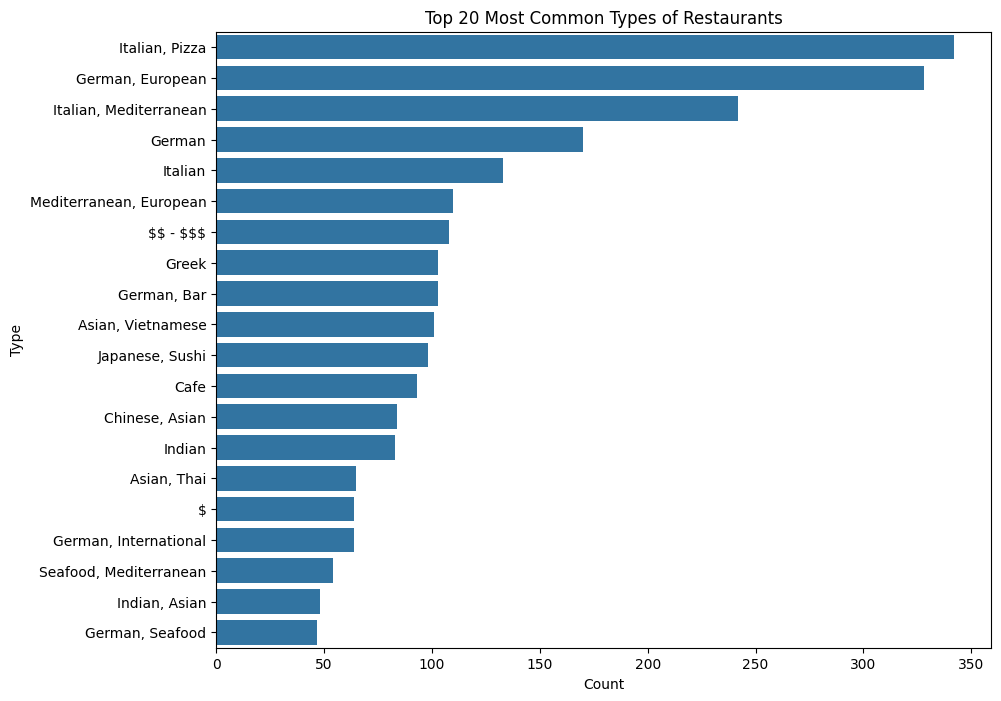

In [34]:
#| echo: true
#| code-fold: true
#| panel: input
# Get the top 20 most common types
top_20_types = combined_df['type'].value_counts().head(20).index

plt.figure(figsize=(10, 8))
sns.countplot(y='type', data=combined_df, order=top_20_types)
plt.title('Top 20 Most Common Types of Restaurants')
plt.xlabel('Count')
plt.ylabel('Type')
plt.show()

In [35]:
#| echo: true
#| code-fold: true
#| panel: input
combined_df.head()

website  \
0  https://www.tripadvisor.com/Restaurant_Review-...   
1  https://www.tripadvisor.com/Restaurant_Review-...   
2  https://www.tripadvisor.com/Restaurant_Review-...   
3  https://www.tripadvisor.com/Restaurant_Review-...   
4  https://www.tripadvisor.com/Restaurant_Review-...   

                        name             score      reviews  \
0                 26 Shibuya  3.5 of 5 bubbles   32 reviews   
1               1. Focaccino  4.5 of 5 bubbles  788 reviews   
2  2. Restaurant Buschbeck's  5.0 of 5 bubbles  392 reviews   
3                3. Bantabaa  5.0 of 5 bubbles   89 reviews   
4    4. Café Couscous - Vege  5.0 of 5 bubbles  140 reviews   

                     type     price  \
0       Japanese, Seafood  $$ - $$$   
1       Italian, Sicilian  $$ - $$$   
2        German, European  $$ - $$$   
3        African, Healthy  $$ - $$$   
4  Mediterranean, Healthy         $   

                                             comment  \
0  If you want to try or experience Japanese food...   
1  Our server Anneka was exceptional and the owne...   
2  ... pasta with either salmon or  & venison ste...   
3                    Rich sauces, excellent  options   
4  The wrap was super fresh and looks very good. ...   

                                      comment2    city  
0                                      Amazing  berlin  
1            Delicious meal - great atmosphere  berlin  
2  Me and my partner really had a good Time...  berlin  
3                                     Warm and  berlin  
4          I ordered a burrito with , hallo...  berlin

In [36]:
#| echo: true
#| code-fold: true
#| panel: input
unique_types = combined_df['type'].unique()


In [37]:
#| echo: true
#| code-fold: true
#| panel: input
unique_types

array(['Japanese, Seafood', 'Italian, Sicilian', 'German, European',
       'African, Healthy', 'Mediterranean, Healthy', 'European, Fusion',
       'Sushi, Asian', 'German, Bar', 'Mediterranean, European',
       'Bar, Eastern European', 'American, Fast Food', 'Indian, Asian',
       'Italian, Mediterranean', 'Italian, Seafood',
       'Cafe, International', 'Fast Food, Healthy', 'International',
       'Cafe, European', 'Caribbean, Latin', 'Italian, Pizza',
       'Middle Eastern, Arabic', 'Chinese, Asian', 'Italian',
       'Seafood, Mediterranean', 'International, European',
       'German, Central European', 'Indian, Grill', 'Indian, Healthy',
       'International, Contemporary', 'German, International',
       'German, Grill', 'Italian, Wine Bar', 'Mediterranean, Barbecue',
       'Asian, Fusion', 'French, European', 'Asian, Vietnamese',
       'American, Bar', 'American', 'Japanese, Steakhouse', 'Seafood',
       'Asian, Indonesian', 'Fusion, Healthy',
       'Caribbean, Cajun 

In [38]:
#| echo: true
#| code-fold: true
#| panel: input
# Get the top 20 most common types
top_20_types = combined_df['type'].value_counts().head(20).index


In [39]:
#| echo: true
#| code-fold: true
#| panel: input
top_20_types

Index(['Italian, Pizza', 'German, European', 'Italian, Mediterranean',
       'German', 'Italian', 'Mediterranean, European', '$$ - $$$', 'Greek',
       'German, Bar', 'Asian, Vietnamese', 'Japanese, Sushi', 'Cafe',
       'Chinese, Asian', 'Indian', 'Asian, Thai', '$', 'German, International',
       'Seafood, Mediterranean', 'Indian, Asian', 'German, Seafood'],
      dtype='object', name='type')

In [40]:
#| echo: true
#| code-fold: true
#| panel: input
filtered_rest = combined_df[(combined_df['type'] != '$$ - $$$') & (combined_df['type'] != '$') & (combined_df['type'] != '$$$$')]



In [41]:
#| echo: true
#| code-fold: true
#| panel: input
filtered_rest

website  \
0     https://www.tripadvisor.com/Restaurant_Review-...   
1     https://www.tripadvisor.com/Restaurant_Review-...   
2     https://www.tripadvisor.com/Restaurant_Review-...   
3     https://www.tripadvisor.com/Restaurant_Review-...   
4     https://www.tripadvisor.com/Restaurant_Review-...   
...                                                 ...   
4827  https://www.tripadvisor.com/Restaurant_Review-...   
4828  https://www.tripadvisor.com/Restaurant_Review-...   
4829  https://www.tripadvisor.com/Restaurant_Review-...   
4830  https://www.tripadvisor.com/Restaurant_Review-...   
4831  https://www.tripadvisor.com/Restaurant_Review-...   

                                        name             score      reviews  \
0                                 26 Shibuya  3.5 of 5 bubbles   32 reviews   
1                               1. Focaccino  4.5 of 5 bubbles  788 reviews   
2                  2. Restaurant Buschbeck's  5.0 of 5 bubbles  392 reviews   
3                                3. Bantabaa  5.0 of 5 bubbles   89 reviews   
4                    4. Café Couscous - Vege  5.0 of 5 bubbles  140 reviews   
...                                      ...               ...          ...   
4827                        1976. Sushi Saku  4.5 of 5 bubbles    3 reviews   
4828                         1977. Sushi Cam  4.5 of 5 bubbles    3 reviews   
4829                        1978. Kugler Alm  3.5 of 5 bubbles  114 reviews   
4830            1979. Die Schokoladengalerie  5.0 of 5 bubbles    5 reviews   
4831  1980. Cafe Hohenbrunn Restaurant & Bar  4.0 of 5 bubbles   13 reviews   

                          type     price  \
0            Japanese, Seafood  $$ - $$$   
1            Italian, Sicilian  $$ - $$$   
2             German, European  $$ - $$$   
3             African, Healthy  $$ - $$$   
4       Mediterranean, Healthy         $   
...                        ...       ...   
4827        Japanese, Peruvian       NaN   
4828                     Sushi       NaN   
4829  German, Central European  $$ - $$$   
4830                      Cafe  $$ - $$$   
4831         Bars & Pubs, Cafe       NaN   

                                                comment  \
0     If you want to try or experience Japanese food...   
1     Our server Anneka was exceptional and the owne...   
2     ... pasta with either salmon or  & venison ste...   
3                       Rich sauces, excellent  options   
4     The wrap was super fresh and looks very good. ...   
...                                                 ...   
4827  Amazing, mesmerising sushi that will remain in...   
4828               Super Sushiladen mit super Besitzern   
4829  The potato salad was homemade and also very de...   
4830                                    Schokolade satt   
4831  Nice and quick service, good menu cart and pol...   

                                         comment2    city  
0                                         Amazing  berlin  
1               Delicious meal - great atmosphere  berlin  
2     Me and my partner really had a good Time...  berlin  
3                                        Warm and  berlin  
4             I ordered a burrito with , hallo...  berlin  
...                                           ...     ...  
4827                                          NaN  munich  
4828                                          NaN  munich  
4829                                          NaN  munich  
4830                                          NaN  munich  
4831                                          NaN  munich  

[4647 rows x 9 columns]

In [42]:

top_20_types = filtered_rest['type'].value_counts().head(20)


In [43]:
top_20_types.head()

type
Italian, Pizza            342
German, European          328
Italian, Mediterranean    242
German                    170
Italian                   133
Name: count, dtype: int64

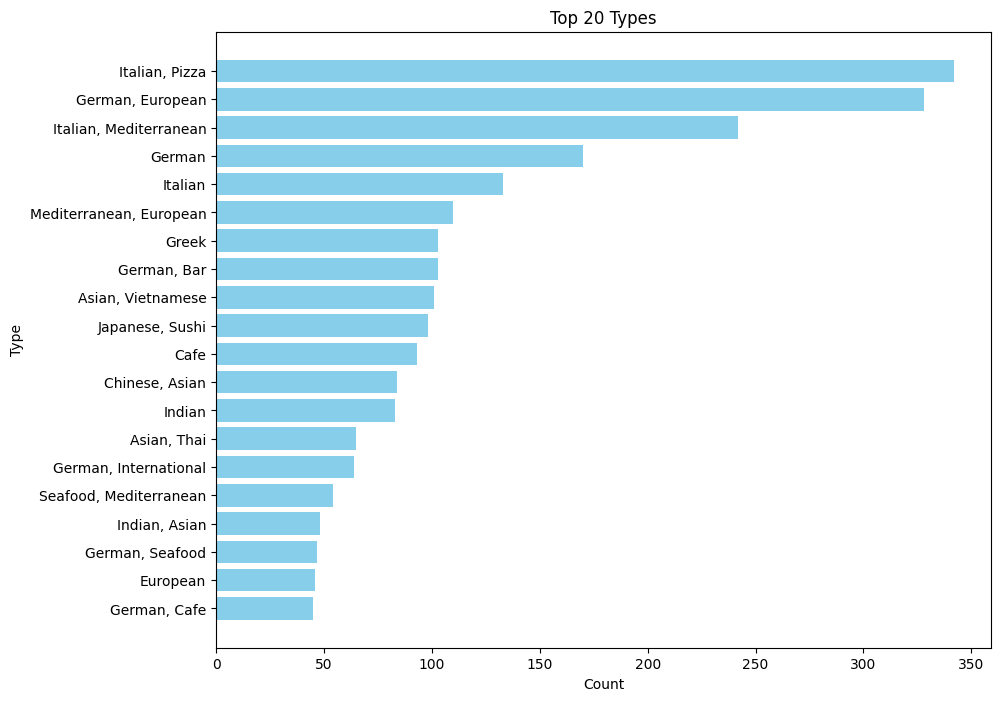

In [44]:
#| echo: true
#| code-fold: true
#| panel: input
# Extract top 20 types and their counts
top_20_types = top_20_types.reset_index()
types = top_20_types['type']
counts = top_20_types['count']

# Plot the distribution of top 20 types
plt.figure(figsize=(10, 8))
plt.barh(types, counts, color='skyblue')
plt.xlabel('Count')
plt.ylabel('Type')
plt.title('Top 20 Types')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count at the top
plt.show()

In [45]:
#| echo: true
#| code-fold: true
#| panel: input
filtered_rest

website  \
0     https://www.tripadvisor.com/Restaurant_Review-...   
1     https://www.tripadvisor.com/Restaurant_Review-...   
2     https://www.tripadvisor.com/Restaurant_Review-...   
3     https://www.tripadvisor.com/Restaurant_Review-...   
4     https://www.tripadvisor.com/Restaurant_Review-...   
...                                                 ...   
4827  https://www.tripadvisor.com/Restaurant_Review-...   
4828  https://www.tripadvisor.com/Restaurant_Review-...   
4829  https://www.tripadvisor.com/Restaurant_Review-...   
4830  https://www.tripadvisor.com/Restaurant_Review-...   
4831  https://www.tripadvisor.com/Restaurant_Review-...   

                                        name             score      reviews  \
0                                 26 Shibuya  3.5 of 5 bubbles   32 reviews   
1                               1. Focaccino  4.5 of 5 bubbles  788 reviews   
2                  2. Restaurant Buschbeck's  5.0 of 5 bubbles  392 reviews   
3                                3. Bantabaa  5.0 of 5 bubbles   89 reviews   
4                    4. Café Couscous - Vege  5.0 of 5 bubbles  140 reviews   
...                                      ...               ...          ...   
4827                        1976. Sushi Saku  4.5 of 5 bubbles    3 reviews   
4828                         1977. Sushi Cam  4.5 of 5 bubbles    3 reviews   
4829                        1978. Kugler Alm  3.5 of 5 bubbles  114 reviews   
4830            1979. Die Schokoladengalerie  5.0 of 5 bubbles    5 reviews   
4831  1980. Cafe Hohenbrunn Restaurant & Bar  4.0 of 5 bubbles   13 reviews   

                          type     price  \
0            Japanese, Seafood  $$ - $$$   
1            Italian, Sicilian  $$ - $$$   
2             German, European  $$ - $$$   
3             African, Healthy  $$ - $$$   
4       Mediterranean, Healthy         $   
...                        ...       ...   
4827        Japanese, Peruvian       NaN   
4828                     Sushi       NaN   
4829  German, Central European  $$ - $$$   
4830                      Cafe  $$ - $$$   
4831         Bars & Pubs, Cafe       NaN   

                                                comment  \
0     If you want to try or experience Japanese food...   
1     Our server Anneka was exceptional and the owne...   
2     ... pasta with either salmon or  & venison ste...   
3                       Rich sauces, excellent  options   
4     The wrap was super fresh and looks very good. ...   
...                                                 ...   
4827  Amazing, mesmerising sushi that will remain in...   
4828               Super Sushiladen mit super Besitzern   
4829  The potato salad was homemade and also very de...   
4830                                    Schokolade satt   
4831  Nice and quick service, good menu cart and pol...   

                                         comment2    city  
0                                         Amazing  berlin  
1               Delicious meal - great atmosphere  berlin  
2     Me and my partner really had a good Time...  berlin  
3                                        Warm and  berlin  
4             I ordered a burrito with , hallo...  berlin  
...                                           ...     ...  
4827                                          NaN  munich  
4828                                          NaN  munich  
4829                                          NaN  munich  
4830                                          NaN  munich  
4831                                          NaN  munich  

[4647 rows x 9 columns]

In [46]:
#| echo: true
#| code-fold: true
#| panel: input
# Replace the unique values with more descriptive categories
filtered_rest["price_category"] = filtered_rest["price"].replace({
    '$$ - $$$': 'Moderate',
    '$': 'Low',
    '$$$$': 'High'
})

# Now the "price_category" column will have these categories
# You can then analyze or plot based on these categories
price_counts = filtered_rest["price_category"].value_counts()

# Display the count of items in each price category
print(price_counts)

price_category
Moderate    3108
Low          725
High         283
Name: count, dtype: int64


In [47]:
filtered_rest["score"] = filtered_rest["score"].str.replace(' of 5 bubbles', '').astype(float)


In [48]:
def remove_missing_data_convert_reviews(df):
    # Remove rows with missing data
    df.dropna(inplace=True)
    
    # Convert 'reviews' column to float
    df['reviews'] = df['reviews'].astype(float)
    
    return df


In [49]:
# filtered_rest = remove_missing_data_convert_reviews(filtered_rest)


In [50]:
def recommend_restaurant(budget):
    # Clean 'reviews' column    
    if budget <= 1000:
        # Filter restaurants in the low price category
        low_price_restaurants = filtered_rest[filtered_rest['price_category'] == 'Low']
        
        # Get top 5 restaurants with the highest score in the low price category
        top_low_price_restaurants = low_price_restaurants.nlargest(5, 'score')
        
        return top_low_price_restaurants
    
    elif 1000 < budget <= 10000:
        # Filter restaurants in the moderate price category
        moderate_price_restaurants = filtered_rest[filtered_rest['price_category'] == 'Moderate']
        
        # Get top 5 restaurants with the highest score in the moderate price category
        top_moderate_price_restaurants = moderate_price_restaurants.nlargest(5, 'score')
        
        return top_moderate_price_restaurants
    
    else:
        # Filter restaurants in the high price category
        high_price_restaurants = filtered_rest[filtered_rest['price_category'] == 'High']
        
        # Get top 5 restaurants with the highest score in the high price category
        top_high_price_restaurants = high_price_restaurants.nlargest(5, 'score')
        
        return top_high_price_restaurants


In [51]:
# Example usage
budget = 1200  # User's budget in euros
top_restaurants = recommend_restaurant(budget)

In [52]:
#| echo: true
#| code-fold: true
#| panel: input
print("Top 5 Restaurants based on Budget:")
print(top_restaurants)

Top 5 Restaurants based on Budget:
                                              website  \
2   https://www.tripadvisor.com/Restaurant_Review-...   
3   https://www.tripadvisor.com/Restaurant_Review-...   
9   https://www.tripadvisor.com/Restaurant_Review-...   
10  https://www.tripadvisor.com/Restaurant_Review-...   
33  https://www.tripadvisor.com/Restaurant_Review-...   

                         name  score      reviews  \
2   2. Restaurant Buschbeck's    5.0  392 reviews   
3                 3. Bantabaa    5.0   89 reviews   
9            8. 100 Gramm Bar    5.0  189 reviews   
10             9. Burger Turm    5.0  966 reviews   
33             31. Stadtsalat    5.0  100 reviews   

                           type     price  \
2              German, European  $$ - $$$   
3              African, Healthy  $$ - $$$   
9         Bar, Eastern European  $$ - $$$   
10          American, Fast Food  $$ - $$$   
33  International, Contemporary  $$ - $$$   

                                

In [53]:
#| echo: true
#| code-fold: true
#| panel: input
munich_df = combined_df[combined_df["city"] == "munich"]


In [54]:
def recommend_restaurant(budget):
    # Clean 'reviews' column    
    if budget <= 1000:
        # Filter restaurants in the low price category
        low_price_restaurants = munich_df[munich_df['price_category'] == 'Low']
        
        # Get top 5 restaurants with the highest score in the low price category
        top_low_price_restaurants = low_price_restaurants.nlargest(5, 'score')
        
        return top_low_price_restaurants
    
    elif 1000 < budget <= 10000:
        # Filter restaurants in the moderate price category
        moderate_price_restaurants = munich_df[munich_df['price_category'] == 'Moderate']
        
        # Get top 5 restaurants with the highest score in the moderate price category
        top_moderate_price_restaurants = moderate_price_restaurants.nlargest(5, 'score')
        
        return top_moderate_price_restaurants
    
    else:
        # Filter restaurants in the high price category
        high_price_restaurants = munich_df[munich_df['price_category'] == 'High']
        
        # Get top 5 restaurants with the highest score in the high price category
        top_high_price_restaurants = high_price_restaurants.nlargest(5, 'score')
        
        return top_high_price_restaurants


In [55]:
# Example usage
budget = 12000  # User's budget in euros
top_restaurants = recommend_restaurant(budget)

KeyError: 'price_category'

### Hotel Data

In [106]:
# Load data from CSV file
hotel_berlin = pd.read_csv('/Users/emredeveci/Desktop/data science/Travel Destination Recommender/data_mining/hotel_berlin - Sheet1.csv')
hotel_berlin['city'] = 'berlin'

hotel_berlin.head()

website  \
0  https://www.booking.com/hotel/de/the-social-hu...   
1  https://www.booking.com/hotel/de/innside-by-me...   
2  https://www.booking.com/hotel/de/motel-one-ber...   
3  https://www.booking.com/hotel/de/titanic-chaus...   
4  https://www.booking.com/hotel/de/motel-one-ber...   

                                   name       location        distance  score  \
0  The Social Hub Berlin Alexanderplatz  Mitte, Berlin  Center: 2.8 km    8.2   
1         INNSiDE by Meliá Berlin Mitte  Mitte, Berlin  Center: 1.9 km    8.3   
2         Motel One Berlin Spittelmarkt  Mitte, Berlin  Center: 1.7 km    8.7   
3               TITANIC Chaussee Berlin  Mitte, Berlin  Center: 1.8 km    8.2   
4       Motel One Berlin-Alexanderplatz  Mitte, Berlin  Center: 2.4 km    8.6   

                        reviews                  type                  type2  \
0                 7,473 reviews  Executive Queen Room           1 double bed   
1  Sustainability certification         6,031 reviews       The INNSiDE Room   
2                 4,667 reviews            Queen room           1 double bed   
3                11,604 reviews          Classic room  Several types of beds   
4                12,307 reviews            Queen room           1 double bed   

       day price    city  
0  1 night   €80  berlin  
1  1 night   €93  berlin  
2  1 night   €93  berlin  
3  1 night   €96  berlin  
4  1 night  €104  berlin

In [105]:
# Load data from CSV file
hotel_bremen = pd.read_csv('/Users/emredeveci/Desktop/data science/Travel Destination Recommender/data_mining/hotel_bremen - Sheet1.csv')
hotel_bremen['city'] = 'bremen'

hotel_bremen.head()

website  \
0  https://www.booking.com/hotel/de/townside-host...   
1  https://www.booking.com/hotel/de/moxy-bremen.e...   
2  https://www.booking.com/hotel/de/am-werdersee....   
3  https://www.booking.com/hotel/de/pension-isabe...   
4  https://www.booking.com/hotel/de/hastedter-hee...   

                       name            location            distance score  \
0    Townside Hostel Bremen       Mitte, Bremen  1.1 km from centre   7.7   
1               Moxy Bremen       Walle, Bremen  1.9 km from centre   8.3   
2   Apartments Am Werdersee    Neustadt, Bremen  1.8 km from centre   7.5   
3          Pension Isabel I    Neustadt, Bremen  0.8 km from centre   7.9   
4  Rana's Zimmervermittlung  Hemelingen, Bremen  4.3 km from centre   6.7   

         reviews                                type  \
0    469 reviews  Bed in 10-Bed Mixed Dormitory Room   
1  2,610 reviews                  MOXY Sleeper Queen   
2  1,324 reviews    Single Room with Shared Bathroom   
3    480 reviews    Single Room with Shared Bathroom   
4    519 reviews                           Apartment   

                                               type2               day  price  \
0                                         1 bunk bed  1 night, 1 adult   € 23   
1                                 1 large double bed  1 night, 1 adult  € 135   
2  4 beds (2 singles, 1 double, 1 extra-large dou...  1 night, 1 adult   € 47   
3                                       1 single bed  1 night, 1 adult   € 46   
4                                      2 single beds  1 night, 1 adult   € 30   

     city  
0  bremen  
1  bremen  
2  bremen  
3  bremen  
4  bremen

In [104]:
# Load data from CSV file
hotel_hamburg = pd.read_csv('/Users/emredeveci/Desktop/data science/Travel Destination Recommender/data_mining/hotel_hamburg - Sheet1.csv')
hotel_hamburg['city'] = 'hamburg'

hotel_hamburg.head()

website  \
0  https://www.booking.com/hotel/de/apartment040....   
1  https://www.booking.com/hotel/de/cab20.en-gb.h...   
2  https://www.booking.com/hotel/de/hood-house.en...   
3  https://www.booking.com/hotel/de/apartmenthote...   
4  https://www.booking.com/hotel/de/hampton-by-hi...   

                                    name              location  \
0                           Apartment040   Uhlenhorst, Hamburg   
1                                  CAB20    St. Georg, Hamburg   
2                             hood house   Winterhude, Hamburg   
3          Apartment-Hotel Hamburg Mitte               Hamburg   
4  Hampton By Hilton Hamburg City Centre  Hammerbrook, Hamburg   

             distance score         reviews  \
0  2.8 km from centre   8.7   2,623 reviews   
1  1.1 km from centre   8.5  15,506 reviews   
2    4 km from centre   8.6   3,309 reviews   
3  3.4 km from centre   8.2   8,221 reviews   
4  1.1 km from centre   7.9   9,997 reviews   

                                type  \
0                    Superior Studio   
1  Single Cabin with Shared Bathroom   
2                          Cozyhood+   
3          Junior Suite with Balcony   
4           Queen Room with Sofa Bed   

                                       type2               day  price     city  
0                               1 double bed  1 night, 1 adult  € 292  hamburg  
1                               1 single bed  1 night, 1 adult  € 178  hamburg  
2                         1 large double bed  1 night, 1 adult  € 379  hamburg  
3  2 beds (1 extra-large double, 1 sofa bed)  1 night, 1 adult  € 454  hamburg  
4        2 beds (1 sofa bed, 1 large double)  1 night, 1 adult  € 222  hamburg

In [129]:
# Load data from CSV file
hotel_munich = pd.read_csv('/Users/emredeveci/Desktop/data science/Travel Destination Recommender/data_mining/hotel_munich - Sheet1.csv')
# Add a new column with all rows containing "munich"
hotel_munich['city'] = 'munich'
hotel_munich.head()

website  \
0  https://www.booking.com/hotel/de/pestana-berli...   
1  https://www.booking.com/hotel/de/bbberlin.en-g...   
2  https://www.booking.com/hotel/de/titanic-chaus...   
3  https://www.booking.com/hotel/de/motel-one-ber...   
4  https://www.booking.com/hotel/de/schulz-plus.e...   

                                                name  \
0                          Pestana Berlin Tiergarten   
1  Hotel Berlin, Berlin, a member of Radisson Ind...   
2                            TITANIC Chaussee Berlin   
3                        Motel One Berlin-Tiergarten   
4         Emma by Schulz Hotel Berlin Friedrichshain   

                           location            distance score         reviews  \
0                     Mitte, Berlin  2.1 km from centre     8   5,455 reviews   
1                     Mitte, Berlin  2.1 km from centre     8  14,334 reviews   
2                     Mitte, Berlin  1.8 km from centre   8.2  11,533 reviews   
3      Tempelhof-Schöneberg, Berlin  2.5 km from centre   8.2   4,432 reviews   
4  Friedrichshain-Kreuzberg, Berlin    4 km from centre   8.6     285 reviews   

                       type                     type2               day  \
0        Deluxe Double Room  1 extra-large double bed  1 night, 1 adult   
1           Individual Room              1 single bed  1 night, 1 adult   
2              Classic Room        Multiple bed types  1 night, 1 adult   
3  Room with Queen Size Bed        1 large double bed  1 night, 1 adult   
4        Deluxe Single Room              1 single bed  1 night, 1 adult   

   price    city  
0  € 174  munich  
1  € 147  munich  
2  € 103  munich  
3  € 125  munich  
4  € 161  munich

In [151]:
# Concatenate the three dataframes along the rows (axis=0)
combined_hotel = pd.concat([hotel_hamburg, hotel_berlin, hotel_munich,hotel_bremen], ignore_index=True)

# Save the combined dataframe to a new CSV file
combined_hotel.to_csv('combined_hotel.csv', index=False)
combined_hotel.head()

website  \
0  https://www.booking.com/hotel/de/apartment040....   
1  https://www.booking.com/hotel/de/cab20.en-gb.h...   
2  https://www.booking.com/hotel/de/hood-house.en...   
3  https://www.booking.com/hotel/de/apartmenthote...   
4  https://www.booking.com/hotel/de/hampton-by-hi...   

                                    name              location  \
0                           Apartment040   Uhlenhorst, Hamburg   
1                                  CAB20    St. Georg, Hamburg   
2                             hood house   Winterhude, Hamburg   
3          Apartment-Hotel Hamburg Mitte               Hamburg   
4  Hampton By Hilton Hamburg City Centre  Hammerbrook, Hamburg   

             distance score         reviews  \
0  2.8 km from centre   8.7   2,623 reviews   
1  1.1 km from centre   8.5  15,506 reviews   
2    4 km from centre   8.6   3,309 reviews   
3  3.4 km from centre   8.2   8,221 reviews   
4  1.1 km from centre   7.9   9,997 reviews   

                                type  \
0                    Superior Studio   
1  Single Cabin with Shared Bathroom   
2                          Cozyhood+   
3          Junior Suite with Balcony   
4           Queen Room with Sofa Bed   

                                       type2               day  price     city  
0                               1 double bed  1 night, 1 adult  € 292  hamburg  
1                               1 single bed  1 night, 1 adult  € 178  hamburg  
2                         1 large double bed  1 night, 1 adult  € 379  hamburg  
3  2 beds (1 extra-large double, 1 sofa bed)  1 night, 1 adult  € 454  hamburg  
4        2 beds (1 sofa bed, 1 large double)  1 night, 1 adult  € 222  hamburg

In [152]:
combined_hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   website   1092 non-null   object
 1   name      1092 non-null   object
 2   location  1092 non-null   object
 3   distance  1092 non-null   object
 4   score     1059 non-null   object
 5   reviews   1059 non-null   object
 6   type      1092 non-null   object
 7   type2     1087 non-null   object
 8   day       1092 non-null   object
 9   price     1092 non-null   object
 10  city      1092 non-null   object
dtypes: object(11)
memory usage: 94.0+ KB


In [153]:
# Remove '€' symbol and comma, then convert 'price' column to float
combined_hotel['price'] = combined_hotel['price'].str.replace('€', '').str.replace(',', '').astype(float)


In [154]:
combined_hotel.head()

website  \
0  https://www.booking.com/hotel/de/apartment040....   
1  https://www.booking.com/hotel/de/cab20.en-gb.h...   
2  https://www.booking.com/hotel/de/hood-house.en...   
3  https://www.booking.com/hotel/de/apartmenthote...   
4  https://www.booking.com/hotel/de/hampton-by-hi...   

                                    name              location  \
0                           Apartment040   Uhlenhorst, Hamburg   
1                                  CAB20    St. Georg, Hamburg   
2                             hood house   Winterhude, Hamburg   
3          Apartment-Hotel Hamburg Mitte               Hamburg   
4  Hampton By Hilton Hamburg City Centre  Hammerbrook, Hamburg   

             distance score         reviews  \
0  2.8 km from centre   8.7   2,623 reviews   
1  1.1 km from centre   8.5  15,506 reviews   
2    4 km from centre   8.6   3,309 reviews   
3  3.4 km from centre   8.2   8,221 reviews   
4  1.1 km from centre   7.9   9,997 reviews   

                                type  \
0                    Superior Studio   
1  Single Cabin with Shared Bathroom   
2                          Cozyhood+   
3          Junior Suite with Balcony   
4           Queen Room with Sofa Bed   

                                       type2               day  price     city  
0                               1 double bed  1 night, 1 adult  292.0  hamburg  
1                               1 single bed  1 night, 1 adult  178.0  hamburg  
2                         1 large double bed  1 night, 1 adult  379.0  hamburg  
3  2 beds (1 extra-large double, 1 sofa bed)  1 night, 1 adult  454.0  hamburg  
4        2 beds (1 sofa bed, 1 large double)  1 night, 1 adult  222.0  hamburg

In [155]:
def extract_score(score_str):
    try:
        # Extract the numeric part from the string
        numeric_part = re.search(r'\d+\.\d+|\d+', score_str).group()
        return float(numeric_part)  # Convert the numeric part to float
    except:
        return None

# Apply the function to 'score' column
combined_hotel['score'] = combined_hotel['score'].apply(extract_score)
combined_hotel['reviews'] = combined_hotel['reviews'].apply(extract_score)

In [156]:
combined_hotel.head()

website  \
0  https://www.booking.com/hotel/de/apartment040....   
1  https://www.booking.com/hotel/de/cab20.en-gb.h...   
2  https://www.booking.com/hotel/de/hood-house.en...   
3  https://www.booking.com/hotel/de/apartmenthote...   
4  https://www.booking.com/hotel/de/hampton-by-hi...   

                                    name              location  \
0                           Apartment040   Uhlenhorst, Hamburg   
1                                  CAB20    St. Georg, Hamburg   
2                             hood house   Winterhude, Hamburg   
3          Apartment-Hotel Hamburg Mitte               Hamburg   
4  Hampton By Hilton Hamburg City Centre  Hammerbrook, Hamburg   

             distance  score  reviews                               type  \
0  2.8 km from centre    8.7      2.0                    Superior Studio   
1  1.1 km from centre    8.5     15.0  Single Cabin with Shared Bathroom   
2    4 km from centre    8.6      3.0                          Cozyhood+   
3  3.4 km from centre    8.2      8.0          Junior Suite with Balcony   
4  1.1 km from centre    7.9      9.0           Queen Room with Sofa Bed   

                                       type2               day  price     city  
0                               1 double bed  1 night, 1 adult  292.0  hamburg  
1                               1 single bed  1 night, 1 adult  178.0  hamburg  
2                         1 large double bed  1 night, 1 adult  379.0  hamburg  
3  2 beds (1 extra-large double, 1 sofa bed)  1 night, 1 adult  454.0  hamburg  
4        2 beds (1 sofa bed, 1 large double)  1 night, 1 adult  222.0  hamburg

In [157]:
combined_hotel.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   website   1092 non-null   object 
 1   name      1092 non-null   object 
 2   location  1092 non-null   object 
 3   distance  1092 non-null   object 
 4   score     832 non-null    float64
 5   reviews   1058 non-null   float64
 6   type      1092 non-null   object 
 7   type2     1087 non-null   object 
 8   day       1092 non-null   object 
 9   price     1092 non-null   float64
 10  city      1092 non-null   object 
dtypes: float64(3), object(8)
memory usage: 94.0+ KB


In [162]:
# Count the number of prices in different ranges
under_100_count = (combined_hotel['price'] < 100).sum()
between_100_500_count = ((combined_hotel['price'] >= 100) & (combined_hotel['price'] <= 300)).sum()
over_500_count = (combined_hotel['price'] > 500).sum()

# Print the counts
print("Number of hotels:")
print(f"- Under 100 euro: {under_100_count}")
print(f"- Between 100 and 500 euro: {between_100_500_count}")
print(f"- Over 500 euro: {over_500_count}")

Number of hotels:
- Under 100 euro: 265
- Between 100 and 500 euro: 719
- Over 500 euro: 18


In [163]:
# Group the DataFrame by the 'city' column and count the number of hotels under 100 euros in each city
under_100_count_per_city = combined_hotel[combined_hotel['price'] < 100].groupby('city').size()

# Print the counts for each city
print("Number of hotels under 100 euro in each city:")
print(under_100_count_per_city)


Number of hotels under 100 euro in each city:
city
berlin     97
bremen     60
hamburg    29
munich     79
dtype: int64


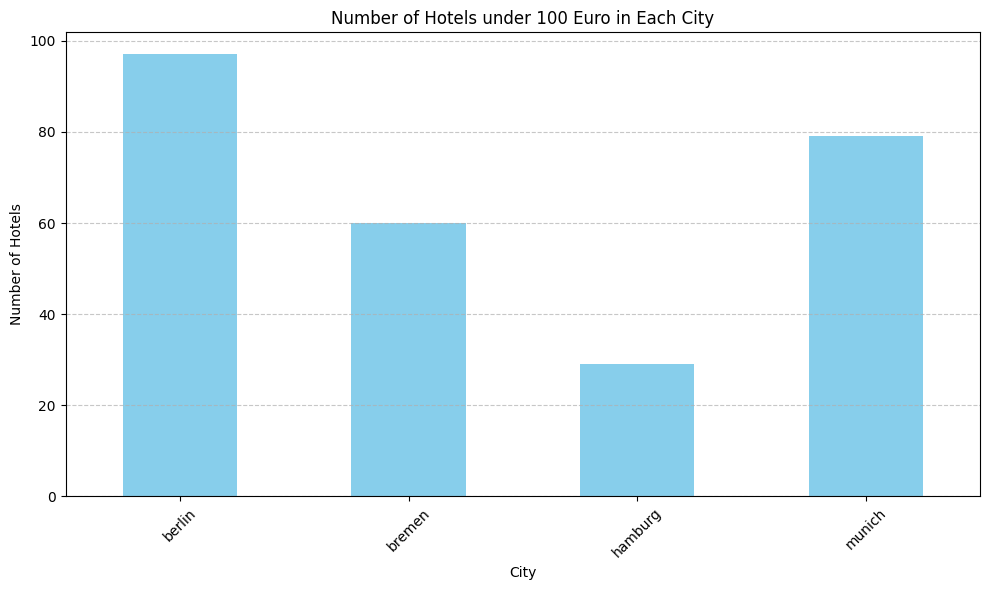

In [164]:

# Plot the histogram
plt.figure(figsize=(10, 6))
under_100_count_per_city.plot(kind='bar', color='skyblue')
plt.title('Number of Hotels under 100 Euro in Each City')
plt.xlabel('City')
plt.ylabel('Number of Hotels')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [165]:
def recommend_hotels(budget):
    if budget <= 1000:
        # Filter tours in the low price category
        low_price_hotels = combined_hotel[combined_hotel['price'] <= 100]
        
        # Get top 5 tours with the highest score in the low price category
        top_low_price_tours = low_price_hotels.nlargest(5, 'score')
        
        return top_low_price_tours
    
    elif 1000 < budget <= 10000:
        # Filter tours in the moderate price category
        moderate_price_hotels = combined_hotel[(combined_hotel['price'] > 100) & (all_tours['price'] <= 300)]
        
        # Get top 5 tours with the highest score in the moderate price category
        top_moderate_price_tours = moderate_price_hotels.nlargest(5, 'score')
        
        return top_moderate_price_tours
    
    else:
        # Filter tours in the high price category
        high_price_hotels = combined_hotel[combined_hotel['price'] > 300]
        
        # Get top 5 tours with the highest score in the high price category
        top_high_price_tours = high_price_hotels.nlargest(5, 'score')
        
        return top_high_price_tours


In [167]:

# Example usage
budget = 1500  # User's budget in dollars
top_hotels = recommend_hotels(budget)

print("Top 5 Tours based on Budget:")
top_hotels.head()

Top 5 Tours based on Budget:


website  \
695   https://www.booking.com/hotel/de/top-floor-pen...   
741   https://www.booking.com/hotel/de/3-personen-ap...   
789   https://www.booking.com/hotel/de/imagination-i...   
928   https://www.booking.com/hotel/de/dream-cuddle-...   
1044  https://www.booking.com/hotel/de/stay-house.en...   

                                                   name  \
695                     Top floor Penthouse with Garden   
741                     3 Personen Apartment im Zentrum   
789                Imagination in the Heart of the city   
928                                   Dream cuddle Nest   
1044  Ferienhaus mit Privatparkplatz, Terrasse und K...   

                              location            distance  score  reviews  \
695   Friedrichshain-Kreuzberg, Berlin  3.1 km from centre   10.0      1.0   
741   Friedrichshain-Kreuzberg, Berlin  4.1 km from centre   10.0      4.0   
789                      Mitte, Berlin  2.7 km from centre   10.0      1.0   
928                     Pankow, Berlin  5.1 km from centre   10.0      1.0   
1044                Hemelingen, Bremen  6.2 km from centre   10.0      2.0   

                       type                                     type2  \
695   One-Bedroom Apartment                              1 double bed   
741   One-Bedroom Apartment                              1 double bed   
789   One-Bedroom Apartment                              1 double bed   
928   One-Bedroom Apartment                              1 double bed   
1044           Holiday Home  5 beds (4 singles, 1 extra-large double)   

                   day  price    city  
695   1 night, 1 adult  205.0  munich  
741   1 night, 1 adult  243.0  munich  
789   1 night, 1 adult  153.0  munich  
928   1 night, 1 adult  306.0  munich  
1044  1 night, 1 adult  259.0  bremen


## Step 6: Data Exploration

- Decide on data storage method (CSV files, databases like SQLite or PostgreSQL).



### must see

In [ ]:
germany_df.head()

website1  \
0  https://lonelyplanetstatic.imgix.net/marketing...   
1  https://lp-cms-production.imgix.net/2019-06/2a...   
2  https://lonelyplanetstatic.imgix.net/marketing...   
3  https://lonelyplanetstatic.imgix.net/marketing...   
4  https://lonelyplanetstatic.imgix.net/marketing...   

                                            website2  \
0  https://www.lonelyplanet.com/germany/lower-sax...   
1  https://www.lonelyplanet.com/germany/bergen-be...   
2  https://www.lonelyplanet.com/germany/lower-sax...   
3  https://www.lonelyplanet.com/germany/bremen-ci...   
4  https://www.lonelyplanet.com/germany/lower-sax...   

                         name               location  \
0         Herrenhäuser Gärten                Hanover   
1  Gedenkstätte Bergen-Belsen  Lower Saxony & Bremen   
2          Schloss Marienburg  Lower Saxony & Bremen   
3     Denkort Bunker Valentin            Bremen City   
4                   Autostadt  Lower Saxony & Bremen   

                                         description      type  \
0  Proof that Hanover is not all buttoned-down bu...  must_see   
1  The Nazi-built camp at Bergen-Belsen began its...  must_see   
2  Perched grandly above the Leine River, the neo...  must_see   
3  In 1943, the Nazis started construction of a m...  must_see   
4  A hit with car buffs of all ages, Autostadt is...  must_see   

                    city  
0  Lower Saxony & Bremen  
1  Lower Saxony & Bremen  
2  Lower Saxony & Bremen  
3  Lower Saxony & Bremen  
4  Lower Saxony & Bremen

Summary Statistics: Obtain summary statistics to understand the data better.


This will give us an overview of the numerical and categorical columns in the dataset.



In [ ]:
# Summary statistics
summary_stats = germany_df.describe(include='all')
summary_stats


website1  \
count                                                1771   
unique                                                691   
top     https://lonelyplanetstatic.imgix.net/marketing...   
freq                                                  402   

                                                 website2        name  \
count                                                1771        1771   
unique                                               1770        1736   
top     https://www.lonelyplanet.com/germany/hamburg/s...  DJH Hostel   
freq                                                    2           6   

       location                                        description      type  \
count      1771                                               1771      1771   
unique       18                                               1768         6   
top      Munich  It took a vociferous grass-roots campaign to s...  must_see   
freq        259                                                  2       505   

          city  
count     1771  
unique       4  
top     Berlin  
freq       927

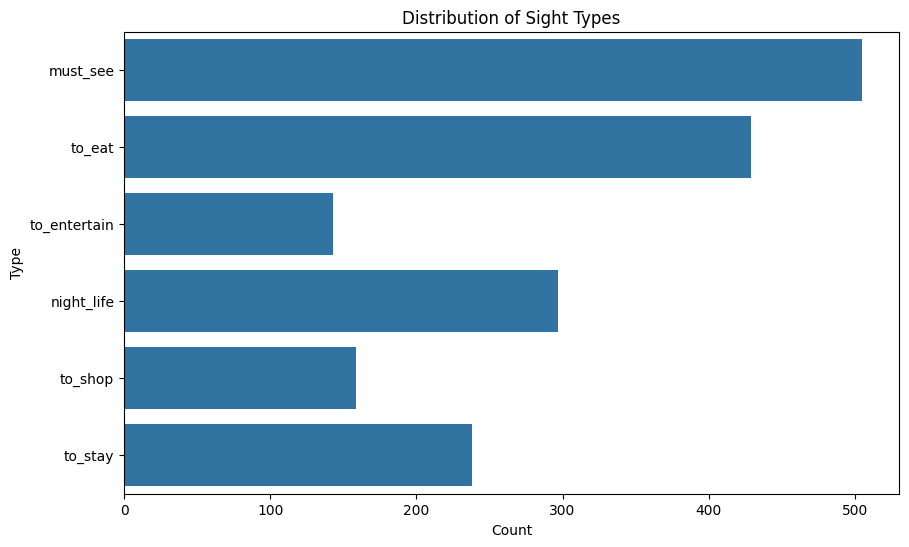

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing the distribution of 'type'
plt.figure(figsize=(10, 6))
sns.countplot(data=germany_df, y='type')
plt.title('Distribution of Sight Types')
plt.xlabel('Count')
plt.ylabel('Type')
plt.show()

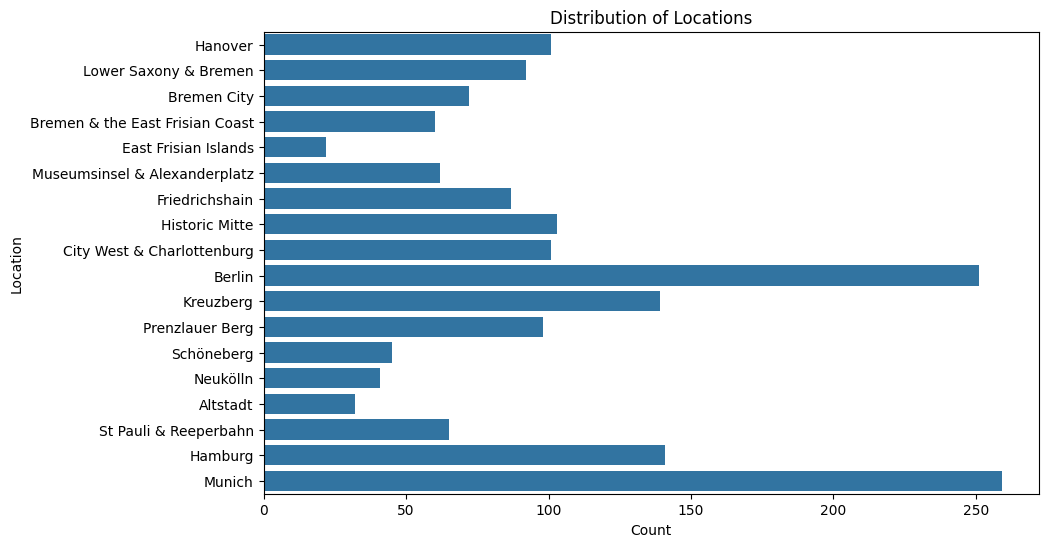

In [ ]:

# Visualizing the distribution of 'location'
plt.figure(figsize=(10, 6))
sns.countplot(data=germany_df, y='location')
plt.title('Distribution of Locations')
plt.xlabel('Count')
plt.ylabel('Location')
plt.show()

In [ ]:
top_sights = germany_df.sort_values(by='description', ascending=False).head(10)
top_sights


website1  \
1279  https://lonelyplanetstatic.imgix.net/marketing...   
689   https://lonelyplanetstatic.imgix.net/marketing...   
1233  https://www.lonelyplanet.com/germany/berlin/kr...   
684   https://lonelyplanetstatic.imgix.net/marketing...   
1591  https://lonelyplanetstatic.imgix.net/marketing...   
737   https://lonelyplanetstatic.imgix.net/marketing...   
1727  https://lonelyplanetstatic.imgix.net/marketing...   
275   https://www.lonelyplanet.com/germany/bremen-ci...   
152   https://www.lonelyplanet.com/germany/bremerhav...   
1433  https://lonelyplanetstatic.imgix.net/marketing...   

                                               website2  \
1279  https://www.lonelyplanet.com/germany/hamburg/n...   
689   https://www.lonelyplanet.com/germany/berlin/hi...   
1233  https://www.lonelyplanet.com/germany/berlin/kr...   
684   https://www.lonelyplanet.com/germany/berlin/re...   
1591  https://www.lonelyplanet.com/germany/munich/ny...   
737   https://www.lonelyplanet.com/germany/berline/m...   
1727  https://www.lonelyplanet.com/germany/munich/sc...   
275   https://www.lonelyplanet.com/germany/bremen-ci...   
152   https://www.lonelyplanet.com/germany/bremerhav...   
1433  https://www.lonelyplanet.com/germany/hamburg/s...   

                            name                         location  \
1279         St Michaelis Kirche                          Hamburg   
689        Nobelhart & Schmutzig                   Historic Mitte   
1233          Hotel Sarotti-Höfe                        Kreuzberg   
684                Taverna Ousia                           Berlin   
1591                 Rock Museum                           Munich   
737                 The Brooklyn    Museumsinsel & Alexanderplatz   
1727          Words’ Worth Books                           Munich   
275   Bürstenhaus Carl Töddensen                      Bremen City   
152            Olympisches Feuer  Bremen & the East Frisian Coast   
1433                  Cafe Geyer            St Pauli & Reeperbahn   

                                            description        type  \
1279  ‘Der Michel’, as it is affectionately called, ...    must_see   
689   ‘Brutally local’ is the motto at the Michelin-...      to_eat   
1233  You’ll have sweet dreams in this 19th-century ...     to_stay   
684   You’ll be as exuberant as Zorba at this easy g...      to_eat   
1591  Your lift ticket to the Olympiaturm also buys ...    must_see   
737   You'll have a fine time giving your credit car...      to_eat   
1727  You'll find tonnes of English-language books, ...     to_shop   
275   You might find yourself pulled in by the lush ...     to_shop   
152   You may find yourself surprised by the quality...      to_eat   
1433  You could come here for the breakfast, or the ...  night_life   

                       city  
1279                Hamburg  
689                  Berlin  
1233                 Berlin  
684                  Berlin  
1591                 Munich  
737                  Berlin  
1727                 Munich  
275   Lower Saxony & Bremen  
152   Lower Saxony & Bremen  
1433                Hamburg

In [ ]:
popular_by_location = germany_df['location'].value_counts().head(5)
print(popular_by_location)

location
Munich            259
Berlin            251
Hamburg           141
Kreuzberg         139
Historic Mitte    103
Name: count, dtype: int64


### Tours

In [ ]:
all_tours.head()

website  \
0  https://www.tripadvisor.com/AttractionProductR...   
1  https://www.tripadvisor.com/AttractionProductR...   
2  https://www.tripadvisor.com/AttractionProductR...   
3  https://www.tripadvisor.com/AttractionProductR...   
4  https://www.tripadvisor.com/AttractionProductR...   

                                                name  score  reviews  \
0          The Local Tour of Hamburg Historic Centre    5.0    784.0   
1  Private Small-Group Hamburg City Tour with a L...    5.0    178.0   
2  Hop-on hop-off on the water with the Maritime ...    4.0     63.0   
3                   Hamburg Dungeon Admission Ticket    4.0    187.0   
4   Hamburg 2-hour harbor tour on the beautiful Elbe    3.5     21.0   

               type   duration  \
0  Historical Tours    2 hours   
1  Historical Tours    3 hours   
2       Day Cruises  1–2 hours   
3  Historical Tours  1–2 hours   
4  Historical Tours    2 hours   

                                            comment1  price      group  \
0  Pay-What-You-Want tour with booking fee!\n\nWi...    3.0  per adult   
1  Welcome to our beloved Hamburg.\nI´m a former ...  264.0  per group   
2  A sightseeing harbor cruise with the Maritime ...   22.0  per adult   
3  Experience 600 years of dark history - if you ...   31.0  per adult   
4  We offer an extensive Hamburg XXL harbor tour ...   38.0  per adult   

      city price_category  
0  hamburg            Low  
1  hamburg       Moderate  
2  hamburg            Low  
3  hamburg            Low  
4  hamburg            Low

In [ ]:
# Summary statistics
summary_stats_tours = all_tours.describe(include='all')
summary_stats_tours


website  \
count                                                1682   
unique                                               1571   
top     https://www.tripadvisor.com/AttractionProductR...   
freq                                                    3   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                                     name       score  \
count                                                1682  771.000000   
unique                                               1550         NaN   
top     Hop-on Hop-off Tour : combined City Tour by Bu...         NaN   
freq                                                    4         NaN   
mean                                                  NaN    4.646563   
std                                                   NaN    0.704290   
min                                                   NaN    1.000000   
25%                                                   NaN    4.500000   
50%                                                   NaN    5.000000   
75%                                                   NaN    5.000000   
max                                                   NaN    5.000000   

           reviews              type duration  \
count   764.000000              1682     1682   
unique         NaN                69      104   
top            NaN  Historical Tours  2 hours   
freq           NaN               713      229   
mean     39.086387               NaN      NaN   
std     103.336300               NaN      NaN   
min       1.000000               NaN      NaN   
25%       2.000000               NaN      NaN   
50%       5.000000               NaN      NaN   
75%      26.000000               NaN      NaN   
max     931.000000               NaN      NaN   

                                                 comment1        price  \
count                                                1672  1675.000000   
unique                                               1403          NaN   
top     Why spend your precious time waiting in long s...          NaN   
freq                                                   17          NaN   
mean                                                  NaN   336.671642   
std                                                   NaN   539.378052   
min                                                   NaN     3.000000   
25%                                                   NaN    70.500000   
50%                                                   NaN   187.000000   
75%                                                   NaN   381.500000   
max                                                   NaN  7633.000000   

            group    city price_category  
count        1682    1682           1682  
unique          2       4              3  
top     per adult  berlin       Moderate  
freq         1309     729            788  
mean          NaN     NaN            NaN  
std           NaN     NaN            NaN  
min           NaN     NaN            NaN  
25%           NaN     NaN            NaN  
50%           NaN     NaN            NaN  
75%           NaN     NaN            NaN  
max           NaN     NaN            NaN

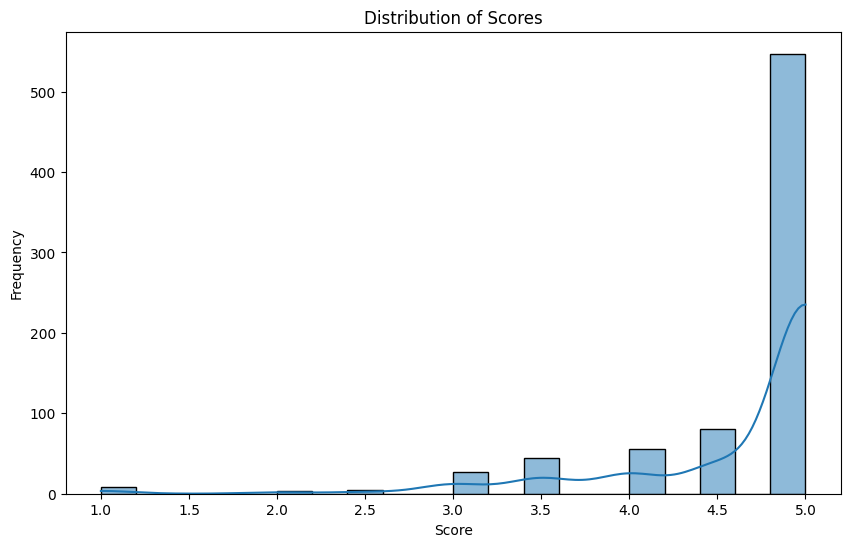

In [ ]:
# Visualizing the distribution of scores
plt.figure(figsize=(10, 6))
sns.histplot(all_tours['score'], bins=20, kde=True)
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

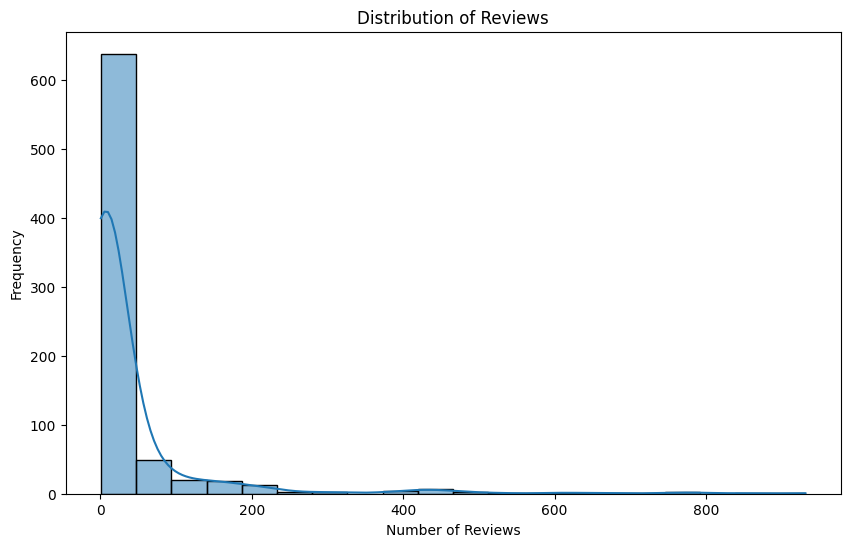

In [ ]:
# Visualizing the distribution of reviews
plt.figure(figsize=(10, 6))
sns.histplot(all_tours['reviews'], bins=20, kde=True)
plt.title('Distribution of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.show()

In [ ]:
top_rated_tours = all_tours.sort_values(by='score', ascending=False).head(10)
print(top_rated_tours)


                                                website  \
0     https://www.tripadvisor.com/AttractionProductR...   
495   https://www.tripadvisor.com/AttractionProductR...   
1020  https://www.tripadvisor.com/AttractionProductR...   
1023  https://www.tripadvisor.com/AttractionProductR...   
1027  https://www.tripadvisor.com/AttractionProductR...   
1028  https://www.tripadvisor.com/AttractionProductR...   
1030  https://www.tripadvisor.com/AttractionProductR...   
1031  https://www.tripadvisor.com/AttractionProductR...   
1036  https://www.tripadvisor.com/AttractionProductR...   
1037  https://www.tripadvisor.com/AttractionProductR...   

                                                   name  score  reviews  \
0             The Local Tour of Hamburg Historic Centre    5.0    784.0   
495   Berlin By Night by Private Minivan Highlights ...    5.0      2.0   
1020                      Guided Hamburg City Bike Tour    5.0    438.0   
1023  3h Kart Tour Hamburg und Umland Go-Kart Stre

In [ ]:
# Aggregate statistics by city
city_stats = all_tours.groupby('city').agg({'score': 'mean', 'reviews': 'mean'})
print(city_stats)


            score    reviews
city                        
berlin   4.724377  42.407821
bremen   4.328125  62.125000
hamburg  4.234375  32.052083
munich   4.723404  34.586331


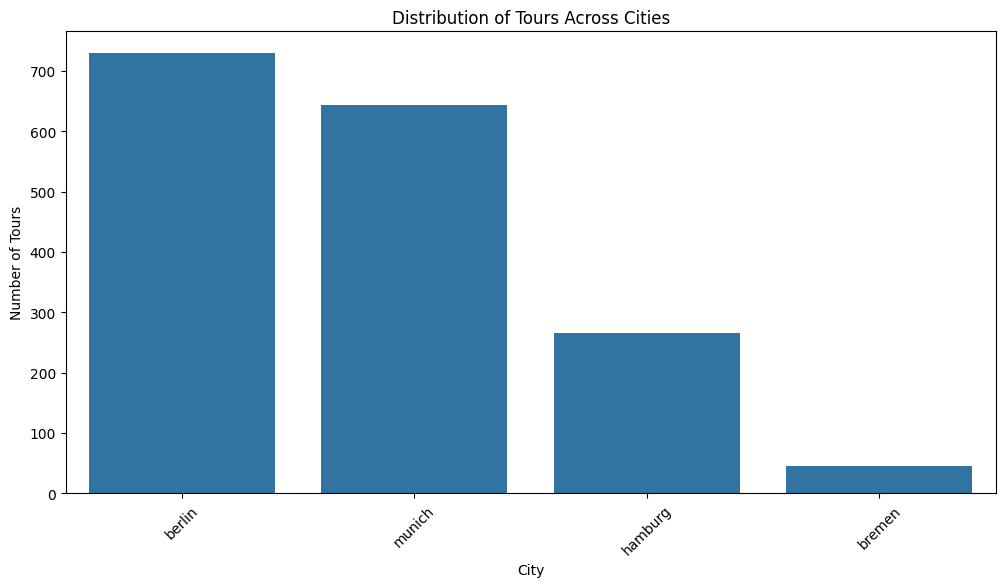

In [ ]:
# Visualizing the distribution of tours across cities
plt.figure(figsize=(12, 6))
sns.countplot(data=all_tours, x='city', order=all_tours['city'].value_counts().index)
plt.title('Distribution of Tours Across Cities')
plt.xlabel('City')
plt.ylabel('Number of Tours')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Compare top-rated tours for each city
top_rated_by_city = all_tours.loc[all_tours.groupby('city')['score'].idxmax()]

# Compare most reviewed tours for each city
most_reviewed_by_city = all_tours.loc[all_tours.groupby('city')['reviews'].idxmax()]

print("Top-rated tours by city:")
print(top_rated_by_city[['city', 'name', 'score']])

print("\nMost reviewed tours by city:")
print(most_reviewed_by_city[['city', 'name', 'reviews']])


Top-rated tours by city:
         city                                               name  score
266    berlin              Discover Berlin Half-Day Walking Tour    5.0
1002   bremen                           Bremen Schnoor Area Tour    5.0
0     hamburg          The Local Tour of Hamburg Historic Centre    5.0
1049   munich  Dachau Concentration Camp Memorial Site Tour f...    5.0

Most reviewed tours by city:
         city                                               name  reviews
295    berlin               Rude Bastards tour of Berlin (CYHIT)    931.0
1015   bremen          The Local Tour of Hamburg Historic Centre    784.0
0     hamburg          The Local Tour of Hamburg Historic Centre    784.0
1053   munich  Salzburg Sightseeing Day Trip from Munich by Rail    666.0



## Step 7: Build the Recommendation Engine

- Create a recommendation engine based on user preferences.
- Implement user input for preferences and calculate scores for destinations.



### City Recommender

In [56]:

# Preprocess the text data
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove punctuation and lowercase the tokens
    table = str.maketrans('', '', string.punctuation)
    tokens = [w.translate(table).lower() for w in tokens]
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Join the tokens back into a string
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

# Apply preprocessing to the "description" column
filtered_df['preprocessed_description'] = filtered_df['description'].apply(preprocess_text)

# Initialize BERTopic model
topic_model = BERTopic()

# Fit the model on preprocessed descriptions
topics, _ = topic_model.fit_transform(filtered_df['preprocessed_description'])
filtered_df['topic'] = topics

# Print the topics and associated descriptions
print("Topics and Associated Descriptions:")
for topic_id in filtered_df['topic'].unique():
    topic_description = filtered_df[filtered_df['topic'] == topic_id]['description'].iloc[0]
    print(f"Topic {topic_id}: {topic_description}")

Topics and Associated Descriptions:
Topic -1: Proof that Hanover is not all buttoned-down business are the grandiose Baroque Royal Gardens of Herrenhausen, about 5km north of the city centre, which…
Topic 6: The Nazi-built camp at Bergen-Belsen began its existence in 1940 as a POW camp, but became a concentration camp after being taken over by the SS in 1943,…
Topic 8: Perched grandly above the Leine River, the neo-Gothic Schloss Marienburg (built from 1858–67) was a present from Hanover's King George V to his wife Marie…
Topic 2: For art lovers, the highlight of Bremen’s Kulturmeile (Cultural Mile) is the Kunsthalle, which presents a large permanent collection of paintings,…
Topic 10: The charming medieval coopers lane was transformed into a prime example of mostly expressionist architecture in the 1920s at the instigation of coffee…
Topic 4: This shiny, space-age museum offers a journey around the world along the longitudinal meridian 8° east, through climate zones in Switzerland, It

In [57]:
topic_model.get_topic_info()

Topic  Count                                  Name  \
0      -1    405              -1_berlin_one_museum_the   
1       0    216            0_music_theatre_club_dance   
2       1     82              1_bar_cocktail_wine_beer   
3       2     50          2_art_artist_artists_gallery   
4       3     44             3_women_fashion_label_men   
5       4     42           4_museum_history_greek_lion   
6       5     36             5_garden_beer_park_munich   
7       6     32         6_memorial_nazi_victims_nazis   
8       7     27                7_wall_berlin_east_war   
9       8     24           8_tower_rulers_church_built   
10      9     22          9_market_flea_handmade_store   
11     10     20          10_coffee_cafe_cakes_roasted   
12     11     20       11_cinema_movies_arthouse_films   
13     12     17          12_maritime_ship_sea_harbour   
14     13     17        13_zoo_kids_enclosures_animals   
15     14     15     14_chocolate_fresh_exotic_gourmet   
16     15     12  15_wwii_bombing_reconstructed_church   
17     16     12   16_stalls_saturday_wednesday_market   
18     17     11        17_island_sky_sand_overlooking   

                                       Representation  \
0   [berlin, one, museum, the, building, germany, ...   
1   [music, theatre, club, dance, venue, concerts,...   
2   [bar, cocktail, wine, beer, drinks, lit, loung...   
3   [art, artist, artists, gallery, contemporary, ...   
4   [women, fashion, label, men, fashions, shop, s...   
5   [museum, history, greek, lion, collection, mid...   
6   [garden, beer, park, munich, altstadt, botanic...   
7   [memorial, nazi, victims, nazis, soviet, 1945,...   
8   [wall, berlin, east, war, border, cold, 1990, ...   
9   [tower, rulers, church, built, lift, munich, g...   
10  [market, flea, handmade, store, souvenirs, bra...   
11  [coffee, cafe, cakes, roasted, beans, java, fr...   
12  [cinema, movies, arthouse, films, indie, scree...   
13  [maritime, ship, sea, harbour, bremen, ships, ...   
14  [zoo, kids, enclosures, animals, educational, ...   
15  [chocolate, fresh, exotic, gourmet, pick, glob...   
16  [wwii, bombing, reconstructed, church, 1943, r...   
17  [stalls, saturday, wednesday, market, leafy, s...   
18  [island, sky, sand, overlooking, hotel, views,...   

                                  Representative_Docs  
0   [former print shop  nonprofit museum one large...  
1   [event venue part historic former wedding crem...  
2   [bar lounge mostly gets relaxed 20s early30s c...  
3   [small  elegant exhibition hall  deutsche bank...  
4   [berlinbased uvr label designs urban fashions ...  
5   [museum chronicles area ’ history middle ages ...  
6   [munich verdant new botanical garden segues sm...  
7   [heart treptower park  gargantuan soviet war m...  
8   [looks like postapocalyptic garden actually me...  
9   [1705 französischer dom built huguenot refuges...  
10  [join throngs thrifty trinket hunters  blearye...  
11  [pioneers thirdwave coffee berlin  yumi kiduk ...  
12  [beloved openair cinema screens international ...  
13  [blueandwhite squarepatterned floor matching d...  
14  [zoo meer ’ spectacular face things  enthrals ...  
15  [fresh fruit vegetables  piles artisanal chees...  
16  [built illegally wwii russian hermit called fa...  
17  [wednesday saturday morning  luck hohum winter...  
18  [soak rays  grand city views colourful cocktai...

In [58]:
topic_model.visualize_topics()


In [59]:
# Merge topics with the original dataframe
merged_df = pd.merge(filtered_df, filtered_df.groupby('location')['topic'].apply(list).reset_index(name='topics'), on='location')

# Group by city and aggregate the topics
city_topics = merged_df.groupby('location')['topics'].agg(lambda x: [item for sublist in x for item in sublist]).reset_index()

# Print cities and their associated topics
print("Cities and Associated Topics:")
for index, row in city_topics.iterrows():
    print(f"{row['location']}: {row['topics']}")

Cities and Associated Topics:
Altstadt: [8, 2, -1, 7, -1, 14, -1, 2, 0, -1, 5, -1, 1, 0, 9, -1, 0, -1, 8, 2, -1, 7, -1, 14, -1, 2, 0, -1, 5, -1, 1, 0, 9, -1, 0, -1, 8, 2, -1, 7, -1, 14, -1, 2, 0, -1, 5, -1, 1, 0, 9, -1, 0, -1, 8, 2, -1, 7, -1, 14, -1, 2, 0, -1, 5, -1, 1, 0, 9, -1, 0, -1, 8, 2, -1, 7, -1, 14, -1, 2, 0, -1, 5, -1, 1, 0, 9, -1, 0, -1, 8, 2, -1, 7, -1, 14, -1, 2, 0, -1, 5, -1, 1, 0, 9, -1, 0, -1, 8, 2, -1, 7, -1, 14, -1, 2, 0, -1, 5, -1, 1, 0, 9, -1, 0, -1, 8, 2, -1, 7, -1, 14, -1, 2, 0, -1, 5, -1, 1, 0, 9, -1, 0, -1, 8, 2, -1, 7, -1, 14, -1, 2, 0, -1, 5, -1, 1, 0, 9, -1, 0, -1, 8, 2, -1, 7, -1, 14, -1, 2, 0, -1, 5, -1, 1, 0, 9, -1, 0, -1, 8, 2, -1, 7, -1, 14, -1, 2, 0, -1, 5, -1, 1, 0, 9, -1, 0, -1, 8, 2, -1, 7, -1, 14, -1, 2, 0, -1, 5, -1, 1, 0, 9, -1, 0, -1, 8, 2, -1, 7, -1, 14, -1, 2, 0, -1, 5, -1, 1, 0, 9, -1, 0, -1, 8, 2, -1, 7, -1, 14, -1, 2, 0, -1, 5, -1, 1, 0, 9, -1, 0, -1, 8, 2, -1, 7, -1, 14, -1, 2, 0, -1, 5, -1, 1, 0, 9, -1, 0, -1, 8, 2, -1, 7, -1, 14, -1, 2, 0

In [60]:

# Now let's visualize these cities and their associated topics on a scatterplot
import plotly.express as px

# Create a DataFrame for the scatterplot
scatter_df = pd.DataFrame({
    'location': city_topics['location'],
    'Topic': city_topics['topics']
})

# Reshape the DataFrame so that each topic gets its own row
scatter_df = scatter_df.explode('Topic').reset_index(drop=True)

# Create the scatterplot
fig = px.scatter(scatter_df, x='location', y='Topic', color='Topic',
                 title='Cities and Associated Topics',
                 labels={'Citlocationy': 'location', 'Topic': 'Topic'},
                 width=800, height=600)

# Update layout for better visualization
fig.update_traces(marker=dict(size=12, opacity=0.8),
                  selector=dict(mode='markers'))

# Show the plot
fig.show()


In [61]:
scatter_df.head(2000)

location Topic
0     Altstadt     8
1     Altstadt     2
2     Altstadt    -1
3     Altstadt     7
4     Altstadt    -1
...        ...   ...
1995    Berlin     6
1996    Berlin    -1
1997    Berlin    -1
1998    Berlin     0
1999    Berlin    13

[2000 rows x 2 columns]

In [62]:
# Filter the DataFrame for Topic 3
topic_3_cities = scatter_df[scatter_df['Topic'] == 3]

# Count the occurrences of each city for Topic 3
city_counts = topic_3_cities['location'].value_counts()

# Get the city with the highest count
most_common_city = city_counts.idxmax()
count_of_most_common_city = city_counts.max()

print(f"The most relevant city for Topic 3 is {most_common_city} with a count of {count_of_most_common_city}.")

The most relevant city for Topic 3 is Berlin with a count of 1804.


In [63]:
for topic_num in range(-1, 19):
    # Filter the DataFrame for the current topic
    topic_cities = scatter_df[scatter_df['Topic'] == topic_num]

    # Check if there are any entries for this topic
    if not topic_cities.empty:
        # Count the occurrences of each city for the current topic
        city_counts = topic_cities['location'].value_counts()

        # Get the city with the highest count
        most_common_city = city_counts.idxmax()
        count_of_most_common_city = city_counts.max()

        print(f"The most relevant city for Topic {topic_num} is {most_common_city} with a count of {count_of_most_common_city}.")
    else:
        print(f"No data for Topic {topic_num}.")

The most relevant city for Topic -1 is Munich with a count of 11696.
The most relevant city for Topic 0 is Munich with a count of 6192.
The most relevant city for Topic 1 is Berlin with a count of 2460.
The most relevant city for Topic 2 is Berlin with a count of 1312.
The most relevant city for Topic 3 is Berlin with a count of 1804.
The most relevant city for Topic 4 is Munich with a count of 2064.
The most relevant city for Topic 5 is Munich with a count of 3096.
The most relevant city for Topic 6 is Berlin with a count of 1640.
The most relevant city for Topic 7 is Berlin with a count of 984.
The most relevant city for Topic 8 is Munich with a count of 1376.
The most relevant city for Topic 9 is Munich with a count of 516.
The most relevant city for Topic 10 is Berlin with a count of 656.
The most relevant city for Topic 11 is Berlin with a count of 1148.
The most relevant city for Topic 12 is Hamburg with a count of 438.
The most relevant city for Topic 13 is Berlin with a count o

### Tour Recommender

In [64]:
def recommend_tours(budget):
    if budget <= 1000:
        # Filter tours in the low price category
        low_price_tours = all_tours[all_tours['price'] <= 50]
        
        # Get top 5 tours with the highest score in the low price category
        top_low_price_tours = low_price_tours.nlargest(5, 'score')
        
        return top_low_price_tours
    
    elif 1000 < budget <= 10000:
        # Filter tours in the moderate price category
        moderate_price_tours = all_tours[(all_tours['price'] > 50) & (all_tours['price'] <= 300)]
        
        # Get top 5 tours with the highest score in the moderate price category
        top_moderate_price_tours = moderate_price_tours.nlargest(5, 'score')
        
        return top_moderate_price_tours
    
    else:
        # Filter tours in the high price category
        high_price_tours = all_tours[all_tours['price'] > 10000]
        
        # Get top 5 tours with the highest score in the high price category
        top_high_price_tours = high_price_tours.nlargest(5, 'score')
        
        return top_high_price_tours


In [66]:

# Example usage
budget = 200  # User's budget in dollars
top_tours = recommend_tours(budget)

print("Top 5 Tours based on Budget:")
top_tours.head()

Top 5 Tours based on Budget:


website  \
0   https://www.tripadvisor.com/AttractionProductR...   
5   https://www.tripadvisor.com/AttractionProductR...   
14  https://www.tripadvisor.com/AttractionProductR...   
15  https://www.tripadvisor.com/AttractionProductR...   
18  https://www.tripadvisor.com/AttractionProductR...   

                                         name  score  reviews  \
0   The Local Tour of Hamburg Historic Centre    5.0    784.0   
5    Treasure Hunt through Hamburgs HafenCity    5.0    163.0   
14              Guided Hamburg City Bike Tour    5.0    438.0   
15   Sailing trip on the Hamburg Outer Alster    5.0     20.0   
18           "Highlights of Hamburg" Biketour    5.0     19.0   

                type   duration  \
0   Historical Tours    2 hours   
5        Fun & Games  2–3 hours   
14        Bike Tours  3–4 hours   
15   Adventure Tours  1–2 hours   
18        City Tours    3 hours   

                                             comment1  price      group  \
0   Pay-What-You-Want tour with booking fee!\n\nWi...    3.0  per adult   
5   A unique connection between solving riddles an...   22.0  per adult   
14  This sightseeing bike tour is the perfect way ...   40.0  per adult   
15  What an experience! Together with other sailor...   39.0  per adult   
18  The most beautiful way to explore Hamburg\n\nE...   40.0  per adult   

       city price_category  
0   hamburg            Low  
5   hamburg            Low  
14  hamburg            Low  
15  hamburg            Low  
18  hamburg            Low

### Activites Recomendation

In [ ]:
filtered_df.head()

website1  \
0  https://lonelyplanetstatic.imgix.net/marketing...   
1  https://lp-cms-production.imgix.net/2019-06/2a...   
2  https://lonelyplanetstatic.imgix.net/marketing...   
3  https://lonelyplanetstatic.imgix.net/marketing...   
4  https://lonelyplanetstatic.imgix.net/marketing...   

                                            website2  \
0  https://www.lonelyplanet.com/germany/lower-sax...   
1  https://www.lonelyplanet.com/germany/bergen-be...   
2  https://www.lonelyplanet.com/germany/lower-sax...   
3  https://www.lonelyplanet.com/germany/bremen-ci...   
4  https://www.lonelyplanet.com/germany/lower-sax...   

                         name               location  \
0         Herrenhäuser Gärten                Hanover   
1  Gedenkstätte Bergen-Belsen  Lower Saxony & Bremen   
2          Schloss Marienburg  Lower Saxony & Bremen   
3     Denkort Bunker Valentin            Bremen City   
4                   Autostadt  Lower Saxony & Bremen   

                                         description      type  \
0  Proof that Hanover is not all buttoned-down bu...  must_see   
1  The Nazi-built camp at Bergen-Belsen began its...  must_see   
2  Perched grandly above the Leine River, the neo...  must_see   
3  In 1943, the Nazis started construction of a m...  must_see   
4  A hit with car buffs of all ages, Autostadt is...  must_see   

                    city                           preprocessed_description  \
0  Lower Saxony & Bremen  proof hanover buttoneddown business grandiose ...   
1  Lower Saxony & Bremen  nazibuilt camp bergenbelsen began existence 19...   
2  Lower Saxony & Bremen  perched grandly leine river  neogothic schloss...   
3  Lower Saxony & Bremen  1943  nazis started construction massive concr...   
4  Lower Saxony & Bremen  hit car buffs ages  autostadt celebration thin...   

   topic  
0     -1  
1      7  
2     -1  
3      7  
4     -1

In [ ]:

# Assuming the most relevant city for Topic 3 is "Altstadt"
most_common_city = "Munich"

# Filter the DataFrame for the most relevant city
city_df = filtered_df[filtered_df['location'] == most_common_city]


In [ ]:

# Sort the rows based on their relevance to Topic 3
topic_3_sorted = city_df[city_df['topic'] == 4].sort_values(by='topic', ascending=False)

# Get the top 5 things to do in the city for Topic 3
top_5_things_to_do = topic_3_sorted.head(5)[['website1', 'name', 'location', 'description', 'type', 'city']]


In [ ]:

print(f"The best 5 things to do in {most_common_city} for Topic 3 are:")
top_5_things_to_do.head()

The best 5 things to do in Munich for Topic 3 are:


website1  \
1653  https://www.lonelyplanet.com/germany/munich/al...   
1654  https://www.lonelyplanet.com/germany/munich/al...   
1655  https://www.lonelyplanet.com/germany/munich/al...   
1663  https://www.lonelyplanet.com/germany/munich/ma...   
1664  https://www.lonelyplanet.com/germany/munich/al...   

                               name location  \
1653          Bayerische Staatsoper   Munich   
1654   Bayerisches Staatsschauspiel   Munich   
1655          Münchner Kammerspiele   Munich   
1663    Münchner Theater für Kinder   Munich   
1664  Staatstheater am Gärtnerplatz   Munich   

                                            description          type    city  
1653  One of the world's best opera companies, the B...  to_entertain  Munich  
1654  This leading ensemble has gone alternative in ...  to_entertain  Munich  
1655  A venerable theatre with an edgy bent, the Kam...  to_entertain  Munich  
1663  At the Münchner Theater für Kinder budding the...  to_entertain  Munich  
1664  Spruced up to southern German standards for it...  to_entertain  Munich

### Restaurant Recommendation

In [67]:
filtered_rest_df = germany_df[germany_df['type'].isin(['to_eat'])]


In [68]:
filtered_rest_df.head()

website1  \
115  https://www.lonelyplanet.com/germany/lower-sax...   
116  https://www.lonelyplanet.com/germany/lower-sax...   
117  https://www.lonelyplanet.com/germany/hildeshei...   
118  https://www.lonelyplanet.com/germany/norderney...   
119  https://www.lonelyplanet.com/germany/lower-sax...   

                                              website2                  name  \
115  https://www.lonelyplanet.com/germany/lower-sax...                Al-Dar   
116  https://www.lonelyplanet.com/germany/lower-sax...        Vietal Kitchen   
117  https://www.lonelyplanet.com/germany/hildeshei...  Schlegels Weinstuben   
118  https://www.lonelyplanet.com/germany/norderney...               Seesteg   
119  https://www.lonelyplanet.com/germany/lower-sax...                 Basil   

                  location                                        description  \
115                Hanover  This popular Syrian restaurant a stone's throw...   
116                Hanover  Pale-green louvres and bamboo lanterns set a F...   
117  Lower Saxony & Bremen  The lopsided walls of this rose-covered, 500-y...   
118   East Frisian Islands  Nordeney's Michelin-starred restaurant offers ...   
119                Hanover  These former stables to the north of town now ...   

       type                   city  
115  to_eat  Lower Saxony & Bremen  
116  to_eat  Lower Saxony & Bremen  
117  to_eat  Lower Saxony & Bremen  
118  to_eat  Lower Saxony & Bremen  
119  to_eat  Lower Saxony & Bremen

In [69]:
# Preprocess the text data
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove punctuation and lowercase the tokens
    table = str.maketrans('', '', string.punctuation)
    tokens = [w.translate(table).lower() for w in tokens]
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Join the tokens back into a string
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

# Apply preprocessing to the "description" column
filtered_rest_df['preprocessed_description'] = filtered_rest_df['description'].apply(preprocess_text)

# Initialize BERTopic model
topic_model = BERTopic()

# Fit the model on preprocessed descriptions
topics, _ = topic_model.fit_transform(filtered_rest_df['preprocessed_description'])
filtered_rest_df['topic'] = topics


In [74]:
# Print the topics and associated descriptions for filtered_df
print("Topics and Associated Descriptions for filtered_df:")
for topic_id in filtered_rest_df['topic'].unique():
    topic_description = filtered_rest_df[filtered_rest_df['topic'] == topic_id]['description'].iloc[0]
    print(f"Topic {topic_id}: {topic_description}")

Topics and Associated Descriptions for filtered_df:
Topic 0: This popular Syrian restaurant a stone's throw from the Hauptbahnhof features hushed, candlelit dining and attentive service within a pleasant, minimalist…
Topic 1: The lopsided walls of this rose-covered, 500-year-old house add to its charm. Inside are historic rooms and, in one corner, a round, glass-topped table…
Topic -1: Nordeney's Michelin-starred restaurant offers à la carte and multicourse dinners using fresh seasonal ingredients, such as monkfish with fennel and…
Topic 2: Romantic at sundown, glass-walled Pier 51 juts out over the Maschsee. Expect light pasta dishes and a small selection of fish, poultry and red meats on a…
Topic 5: This wonderful seafood restaurant is spread out over several dining rooms with distinct nautical styling (including one that purports to be a copy of…
Topic 3: Feast on zebra steak (yes, really), thieboudienne (a traditional Senegalese fish dish) and other African specialities at this lit

In [76]:
# Merge topics with the original dataframe
merged_df = pd.merge(filtered_rest_df, filtered_rest_df.groupby('location')['topic'].apply(list).reset_index(name='topics'), on='location')

# Group by city and aggregate the topics
city_topics = merged_df.groupby('location')['topics'].agg(lambda x: [item for sublist in x for item in sublist]).reset_index()

# Print cities and their associated topics
print("Cities and Associated Topics:")
for index, row in city_topics.iterrows():
    print(f"{row['location']}: {row['topics']}")

Cities and Associated Topics:
Altstadt: [-1, -1, 0, 2, 0, 3, -1, 3, 1, 5, -1, 3, -1, -1, 0, 2, 0, 3, -1, 3, 1, 5, -1, 3, -1, -1, 0, 2, 0, 3, -1, 3, 1, 5, -1, 3, -1, -1, 0, 2, 0, 3, -1, 3, 1, 5, -1, 3, -1, -1, 0, 2, 0, 3, -1, 3, 1, 5, -1, 3, -1, -1, 0, 2, 0, 3, -1, 3, 1, 5, -1, 3, -1, -1, 0, 2, 0, 3, -1, 3, 1, 5, -1, 3, -1, -1, 0, 2, 0, 3, -1, 3, 1, 5, -1, 3, -1, -1, 0, 2, 0, 3, -1, 3, 1, 5, -1, 3, -1, -1, 0, 2, 0, 3, -1, 3, 1, 5, -1, 3, -1, -1, 0, 2, 0, 3, -1, 3, 1, 5, -1, 3, -1, -1, 0, 2, 0, 3, -1, 3, 1, 5, -1, 3]
Berlin: [4, -1, -1, 6, 0, -1, 0, 1, 1, 1, -1, -1, 2, 2, -1, 3, 0, 0, 1, 1, -1, 1, 2, 0, 1, 2, 0, 0, -1, 1, 4, -1, -1, 1, 4, 1, -1, -1, 4, 0, 0, 0, -1, 1, -1, -1, 3, 0, 1, -1, 3, -1, 0, -1, 2, 4, -1, 4, -1, -1, 6, 0, -1, 0, 1, 1, 1, -1, -1, 2, 2, -1, 3, 0, 0, 1, 1, -1, 1, 2, 0, 1, 2, 0, 0, -1, 1, 4, -1, -1, 1, 4, 1, -1, -1, 4, 0, 0, 0, -1, 1, -1, -1, 3, 0, 1, -1, 3, -1, 0, -1, 2, 4, -1, 4, -1, -1, 6, 0, -1, 0, 1, 1, 1, -1, -1, 2, 2, -1, 3, 0, 0, 1, 1, -1, 1, 2, 0, 1, 2, 0, 0,

In [77]:

# Now let's visualize these cities and their associated topics on a scatterplot
import plotly.express as px

# Create a DataFrame for the scatterplot
scatter_df = pd.DataFrame({
    'location': city_topics['location'],
    'Topic': city_topics['topics']
})

# Reshape the DataFrame so that each topic gets its own row
scatter_df = scatter_df.explode('Topic').reset_index(drop=True)

# Create the scatterplot
fig = px.scatter(scatter_df, x='location', y='Topic', color='Topic',
                 title='Cities and Associated Topics',
                 labels={'Citlocationy': 'location', 'Topic': 'Topic'},
                 width=800, height=600)

# Update layout for better visualization
fig.update_traces(marker=dict(size=12, opacity=0.8),
                  selector=dict(mode='markers'))

# Show the plot
fig.show()


In [78]:
# Filter the DataFrame for Topic 3
topic_3_cities = scatter_df[scatter_df['Topic'] == 2]

# Count the occurrences of each city for Topic 3
city_counts = topic_3_cities['location'].value_counts()

# Get the city with the highest count
most_common_city = city_counts.idxmax()
count_of_most_common_city = city_counts.max()

print(f"The most relevant city for Topic 3 is {most_common_city} with a count of {count_of_most_common_city}.")

The most relevant city for Topic 3 is Berlin with a count of 285.


In [79]:
for topic_num in range(-1, 7):
    # Filter the DataFrame for the current topic
    topic_cities = scatter_df[scatter_df['Topic'] == topic_num]

    # Check if there are any entries for this topic
    if not topic_cities.empty:
        # Count the occurrences of each city for the current topic
        city_counts = topic_cities['location'].value_counts()

        # Get the city with the highest count
        most_common_city = city_counts.idxmax()
        count_of_most_common_city = city_counts.max()

        print(f"The most relevant city for Topic {topic_num} is {most_common_city} with a count of {count_of_most_common_city}.")
    else:
        print(f"No data for Topic {topic_num}.")

The most relevant city for Topic -1 is Berlin with a count of 1083.
The most relevant city for Topic 0 is Munich with a count of 700.
The most relevant city for Topic 1 is Berlin with a count of 684.
The most relevant city for Topic 2 is Berlin with a count of 285.
The most relevant city for Topic 3 is Berlin with a count of 171.
The most relevant city for Topic 4 is Berlin with a count of 285.
The most relevant city for Topic 5 is Hamburg with a count of 160.
The most relevant city for Topic 6 is Hamburg with a count of 160.


In [75]:
topic_model.get_topic_info()

Topic  Count                               Name  \
0     -1    124          -1_menu_bar_sushi_stylish   
1      0     95    0_berlin_german_food_restaurant   
2      1     79     1_cafe_tables_breakfast_coffee   
3      2     40      2_italian_pizza_pizzas_pastas   
4      3     30     3_vegan_burgers_salads_options   
5      4     25  4_vietnamese_thai_korean_japanese   
6      5     21  5_fish_seafood_restaurant_hamburg   
7      6     15     6_seasonal_part_soups_regional   

                                      Representation  \
0  [menu, bar, sushi, stylish, one, serves, place...   
1  [berlin, german, food, restaurant, munich, che...   
2  [cafe, tables, breakfast, coffee, house, table...   
3  [italian, pizza, pizzas, pastas, italy, salads...   
4  [vegan, burgers, salads, options, vegetarian, ...   
5  [vietnamese, thai, korean, japanese, restauran...   
6  [fish, seafood, restaurant, hamburg, sea, dish...   
7  [seasonal, part, soups, regional, number, feed...   

                                 Representative_Docs  
0  [consistently lauded one hamburg creative kitc...  
1  [aparna aurora haunt spices berlin bland india...  
2  [shoeboxsized cafe really comes sunny days vin...  
3  [successful german selfservice chain delivers ...  
4  [bright little caferestaurant naturaledge wood...  
5  [vibrant range small plates  totally vegan vie...  
6  [stylish restaurant excellent choice seafood t...  
7  [erstwhile staff restaurant adjacent bus opera...

In [80]:
topic_model.visualize_topics()


Resteourant recommendation

In [81]:

# Assuming the most relevant city for Topic 3 is "Altstadt"
most_common_city = "Berlin"

# Filter the DataFrame for the most relevant city
city_df = filtered_rest_df[filtered_rest_df['location'] == most_common_city]


In [89]:

# Sort the rows based on their relevance to Topic 3
topic_3_sorted = city_df[city_df['topic'] == 3].sort_values(by='topic', ascending=False)

# Get the top 5 things to do in the city for Topic 3
top_5_things_to_do = topic_3_sorted.head(5)[['website1', 'name', 'location', 'description', 'type', 'city']]


In [90]:

print(f"The best restaurants to go in {most_common_city} for Topic 3 are:")
top_5_things_to_do.head()

The best restaurants to go in Berlin for Topic 3 are:


website1                 name  \
656  https://lonelyplanetstatic.imgix.net/marketing...  Valladares Feinkost   
794  https://lp-cms-production.imgix.net/2019-06/e7...    Weilands Wellfood   
807  https://lonelyplanetstatic.imgix.net/marketing...              geh Veg   

    location                                        description    type  \
656   Berlin  Beautifully situated on the quiet Stephanplatz...  to_eat   
794   Berlin  After a menu revamp, this easy-going day-time ...  to_eat   
807   Berlin  Showing off the simple side of vegan eating, g...  to_eat   

       city  
656  Berlin  
794  Berlin  
807  Berlin

In [ ]:
combined_df.city.value_counts().head(20)


city
munich     1933
hamburg    1838
bremen      750
berlin      311
Name: count, dtype: int64

In [ ]:
combined_df['type'].value_counts()[:20]


type
Italian, Pizza             342
German, European           328
Italian, Mediterranean     242
German                     170
Italian                    133
Mediterranean, European    110
$$ - $$$                   108
Greek                      103
German, Bar                103
Asian, Vietnamese          101
Japanese, Sushi             98
Cafe                        93
Chinese, Asian              84
Indian                      83
Asian, Thai                 65
$                           64
German, International       64
Seafood, Mediterranean      54
Indian, Asian               48
German, Seafood             47
Name: count, dtype: int64


## Step 8: Develop the User Interface

- Build a user interface (web or mobile app) for travelers to interact with.
- Input preferences, receive recommendations, and display destination details.

